In [26]:
import os 
import pandas as pd
from tqdm import tqdm
from collections import Counter, defaultdict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef

path_benchmark = "/media/concha-eloko/Linux/PPT_clean/benchmark"
path_panels = "/media/concha-eloko/Linux/papers/PPT/reviewed_new_figures/panels"

***
### Matrice results: 

In [3]:
# TropiGAT
tropigat_pred_m_df = pd.read_csv(f"{path_benchmark}/TropiGAT.matrices.tsv", sep = "\t", names = ["protein", "prediction"])
tropigat_pred_m_df["protein_id"] = tropigat_pred_m_df["protein"].apply(lambda x : x.split("_Dpo")[0])
tropigat_pred_m_df.columns = ["protein_TropiGAT", "prediction_TropiGAT", "protein_id"]

tropigat_pred_m_df_uf = pd.read_csv(f"{path_benchmark}/TropiGAT_UF.review.matrices.tsv", sep = "\t", names = ["protein", "prediction"])
tropigat_pred_m_df_uf["protein_id"] = tropigat_pred_m_df_uf["protein"].apply(lambda x : x.split("_Dpo")[0])
tropigat_pred_m_df_uf.columns = ["protein_TropiGAT", "prediction_TropiGAT_UF", "protein_id"]
tropigat_pred_m_df_uf = tropigat_pred_m_df_uf[["prediction_TropiGAT_UF", "protein_id"]]


tropigat_pred_m_df_new = pd.read_csv(f"{path_benchmark}/TropiGAT.review.matrices.tsv", sep = "\t", names = ["protein", "prediction"])
tropigat_pred_m_df_new["protein_id"] = tropigat_pred_m_df_new["protein"].apply(lambda x : x.split("_Dpo")[0])
tropigat_pred_m_df_new.columns = ["protein_TropiGAT_new", "prediction_TropiGAT_new", "protein_id"]
tropigat_pred_m_df_new = tropigat_pred_m_df_new[["prediction_TropiGAT_new", "protein_id"]]

# TropiSAGE
tropisage_pred_m_df = pd.read_csv(f"{path_benchmark}/TropiSAGE.review.matrices.tsv", sep = "\t", names = ["protein", "prediction"])
tropisage_pred_m_df["protein_id"] = tropisage_pred_m_df["protein"].apply(lambda x : x.split("_Dpo")[0])
tropisage_pred_m_df.columns = ["protein_TropiSAGE", "prediction_TropiSAGE", "protein_id"]
tropisage_pred_m_df = tropisage_pred_m_df[["prediction_TropiSAGE", "protein_id"]]

# TropiSEQ
tropiseq_pred_m_df = pd.read_csv(f"{path_benchmark}/TropiSEQ.p_05.matrices.tsv", sep = "\t", names = ["protein", "prediction"])
tropiseq_pred_m_df["protein_id_1"] = tropiseq_pred_m_df["protein"].apply(lambda x : x.split("_A")[0] if x.count("_A")>0 else "__".join(x.split(",")[0].split(" ")) if x.count(",")>0 else x)
tropiseq_pred_m_df["protein_id"] = tropiseq_pred_m_df["protein_id_1"].apply(lambda x : x.replace(" cds", "__cds"))
tropiseq_pred_m_df.columns = ["protein_TropiSEQ", "prediction_TropiSEQ", "trash_seq" ,"protein_id"]
tropiseq_pred_m_df = tropiseq_pred_m_df[["prediction_TropiSEQ" ,"protein_id"]]


# TropiSEQ UF
tropiseq_pred_m_df_uf = pd.read_csv(f"{path_benchmark}/TropiSEQ_UF_70.p_05.matrices.tsv", sep = "\t", names = ["protein", "prediction"])
tropiseq_pred_m_df_uf["protein_id_1"] = tropiseq_pred_m_df_uf["protein"].apply(lambda x : x.split("_A")[0] if x.count("_A")>0 else "__".join(x.split(",")[0].split(" ")) if x.count(",")>0 else x)
tropiseq_pred_m_df_uf["protein_id"] = tropiseq_pred_m_df_uf["protein_id_1"].apply(lambda x : x.replace(" cds", "__cds"))
tropiseq_pred_m_df_uf.columns = ["protein_TropiSEQ", "prediction_TropiSEQ_UF", "trash_seq" ,"protein_id"]
tropiseq_pred_m_df_uf = tropiseq_pred_m_df_uf[["prediction_TropiSEQ_UF" ,"protein_id"]]


# TropiLR
tropilr_pred_m_df = pd.read_csv(f"{path_benchmark}/TropiLogReg.matrices.tsv", sep = "\t", names = ["protein", "prediction"])
tropilr_pred_m_df["protein_id_1"] = tropilr_pred_m_df["protein"].apply(lambda x : x.split("_A")[0] if x.count("_A")>0 else "__".join(x.split(",")[0].split(" ")) if x.count(",")>0 else x)
tropilr_pred_m_df["protein_id"] = tropilr_pred_m_df["protein_id_1"].apply(lambda x : x.replace(" cds", "__cds"))
tropilr_pred_m_df.columns = ["protein_TropiLR", "prediction_TropiLR", "trash_seq" ,"protein_id"]
tropilr_pred_m_df = tropilr_pred_m_df[["prediction_TropiLR" ,"protein_id"]]

# SpikeHunter
SH_pred_m_df = pd.read_csv(f"{path_benchmark}/SpikeHunter_predictions.matrices.tsv", sep = "\t", names = ["protein", "prediction"])

SH_pred_m_df["protein_id_1"] = SH_pred_m_df["protein"].apply(lambda x : x.split("_A")[0] if x.count("_A")>0 else "__".join(x.split(",")[0].split(" ")) if x.count(",")>0 else x)
SH_pred_m_df["protein_id"] = SH_pred_m_df["protein_id_1"].apply(lambda x : x.replace(" cds", "__cds"))
SH_pred_m_df.columns = ["protein_SpikeHunter", "prediction_SpikeHunter", "trash_seq" ,"protein_id"]
SH_pred_m_df = SH_pred_m_df[["prediction_SpikeHunter" ,"protein_id"]]


# Merge : 
#merged_df = tropigat_pred_m_df.merge(tropiseq_pred_m_df, on='protein_id', how='inner').merge(SH_pred_m_df, on='protein_id', how='inner').merge(tropigat_pred_m_df_new, on='protein_id', how='inner').merge(tropisage_pred_m_df, on='protein_id', how='inner').merge(tropilr_pred_m_df, on='protein_id', how='inner')

# version with everything: 
merged_df = tropigat_pred_m_df.merge(tropiseq_pred_m_df, on='protein_id', how='inner').merge(tropigat_pred_m_df_uf, on='protein_id', how='inner').merge(tropiseq_pred_m_df_uf, on='protein_id', how='inner').merge(SH_pred_m_df, on='protein_id', how='inner').merge(tropigat_pred_m_df_new, on='protein_id', how='inner').merge(tropisage_pred_m_df, on='protein_id', how='inner').merge(tropilr_pred_m_df, on='protein_id', how='inner')


merged_df["phage"] = merged_df["protein_id"].apply(lambda x : x.split("__")[0] if x.count("__")>0 else x.split("_")[0])


In [4]:
merged_df

,protein_TropiGAT,prediction_TropiGAT,protein_id,prediction_TropiSEQ,prediction_TropiGAT_UF,prediction_TropiSEQ_UF,prediction_SpikeHunter,prediction_TropiGAT_new,prediction_TropiSAGE,prediction_TropiLR,phage
0,K15PH90__cds_54_Dpo_domain,KL123:0.997 ; KL27:0.988 ; KL112:0.985 ; KL14:...,K15PH90__cds_54,No_hits,KL64:0.997 ; KL23:0.986 ; KL67:0.984 ; KL26:0....,No_hits,K106,KL112:0.988 ; KL166:0.968 ; KL8:0.953 ; KL38:0...,KL166:1.0 ; KL112:1.0 ; KL8:0.999 ; KL124:0.99...,No_hits,K15PH90
1,K7PH164C4__cds_20_Dpo_domain,KL39:1.0 ; KL123:0.999 ; KL22:0.996 ; KL114:0....,K7PH164C4__cds_20,No_hits,KL26:1.0 ; KL106:1.0 ; KL149:0.999 ; KL105:0.9...,No_hits,No_hits,KL105:1.0 ; KL149:0.999 ; KL22:0.998 ; KL106:0...,KL47:1.0 ; KL116:1.0 ; KL105:1.0 ; KL39:1.0 ; ...,No_hits,K7PH164C4
2,K32PH164C1__cds_20_Dpo_domain,KL36:1.0 ; KL39:0.998 ; KL25:0.992 ; KL116:0.9...,K32PH164C1__cds_20,No_hits,KL23:1.0 ; KL46:0.999 ; KL26:0.994 ; KL24:0.98...,No_hits,No_hits,KL36:1.0 ; KL105:0.998 ; KL8:0.998 ; KL22:0.99...,KL36:1.0 ; KL166:1.0 ; KL46:1.0 ; KL105:1.0 ; ...,No_hits,K32PH164C1
3,K18PH07C1__cds_245_Dpo_domain,KL3:0.998 ; KL63:0.984 ; KL43:0.94 ; KL145:0.9...,K18PH07C1__cds_245,KL63:0.594 ; KL37:0.235 ; KL164:0.195 ; KL61:0...,KL63:0.967 ; KL6:0.829 ; KL15:0.608 ; KL26:0.594,KL74:0.301 ; KL37:0.235 ; KL164:0.195 ; KL61:0...,K63,KL3:0.93 ; KL63:0.872 ; KL70:0.768 ; KL54:0.64...,KL6:1.0 ; KL63:0.999 ; KL26:0.988 ; KL31:0.974...,KL6:0.523 ; KL63:0.682,K18PH07C1
4,K13PH07C1L__cds_11_Dpo_domain,KL23:0.992 ; KL10:0.99 ; KL30:0.975 ; KL60:0.9...,K13PH07C1L__cds_11,KL13:0.527 ; KL2:0.417 ; KL37:0.235 ; KL164:0....,KL60:0.941 ; KL71:0.88 ; KL122:0.814 ; KL107:0...,KL24:0.36 ; KL37:0.235 ; KL164:0.195 ; KL61:0....,K2,KL12:0.999 ; KL128:0.991 ; KL105:0.962 ; KL36:...,KL105:1.0 ; KL128:0.995 ; KL30:0.995 ; KL36:0....,No_associations,K13PH07C1L
...,...,...,...,...,...,...,...,...,...,...,...
267,PFOEGONH_00078,KL3:1.0 ; KL81:0.985 ; KL14:0.957 ; KL52:0.857...,PFOEGONH_00078,KL35:0.736 ; KL3:0.674 ; KL124:0.332 ; KL37:0....,KL3:0.998 ; KL169:0.931 ; KL35:0.913,KL67:0.913 ; KL53:0.332 ; KL37:0.235 ; KL164:0...,K3,KL3:0.999 ; KL117:0.951 ; KL31:0.789 ; KL52:0....,KL3:1.0 ; KL67:0.99 ; KL14:0.862 ; KL52:0.794 ...,KL35:0.71 ; KL3:0.947,PFOEGONH
268,NBNDMPCG_00163,KL13:0.958 ; KL2:0.954 ; KL57:0.94 ; KL60:0.92...,NBNDMPCG_00163,KL2:0.684 ; KL52:0.239 ; KL37:0.235 ; KL164:0....,KL2:0.937 ; KL18:0.842 ; KL71:0.823 ; KL12:0.773,KL43:0.444 ; KL37:0.235 ; KL164:0.195 ; KL61:0...,K2,KL12:0.998 ; KL13:0.929 ; KL9:0.92 ; KL2:0.652...,KL12:0.999 ; KL9:0.99 ; KL13:0.981 ; KL142:0.9...,KL2:0.829 ; KL52:0.774,NBNDMPCG
269,NJHLHPIG_00061,KL46:0.99 ; KL128:0.975 ; KL18:0.971 ; KL52:0....,NJHLHPIG_00061,KL46:0.937 ; KL18:0.522 ; KL37:0.235 ; KL164:0...,KL46:0.999 ; KL128:0.991 ; KL117:0.96 ; KL17:0...,KL128:0.598 ; KL37:0.235 ; KL164:0.195 ; KL61:...,K46,KL128:0.999 ; KL46:0.999 ; KL12:0.984 ; KL56:0...,KL46:0.999 ; KL56:0.998 ; KL128:0.984 ; KL26:0...,KL46:0.82,NJHLHPIG
270,HIIECEMK_00054,KL60:0.995 ; KL18:0.991 ; KL23:0.943 ; KL14:0....,HIIECEMK_00054,KL13:0.527 ; KL2:0.417 ; KL37:0.235 ; KL164:0....,KL45:0.951 ; KL60:0.927 ; KL2:0.866 ; KL18:0.8...,KL24:0.36 ; KL37:0.235 ; KL164:0.195 ; KL61:0....,K2,KL12:0.991 ; KL18:0.976 ; KL60:0.93 ; KL70:0.7...,KL8:0.999 ; KL12:0.998 ; KL18:0.997 ; KL142:0....,No_associations,HIIECEMK


In [5]:
missing_prot = [prot for prot in list(tropigat_pred_m_df["protein_id"]) if prot not in list(SH_pred_m_df["protein_id"])]
missing_prot_prime = [prot for prot in list(SH_pred_m_df["protein_id"]) if prot not in list(tropigat_pred_m_df["protein_id"])]

In [6]:
missing_prot

['BLCJPOBP_00052']

In [7]:
missing_prot_prime

['K33PH14C2__cds_55', 'K62PH164C2__cds_25']

In [8]:
len(tropigat_pred_m_df), len(tropiseq_pred_m_df),len(SH_pred_m_df), len(merged_df)

(258, 260, 260, 272)

In [9]:
merged_df.columns

Index(['protein_TropiGAT', 'prediction_TropiGAT', 'protein_id',
       'prediction_TropiSEQ', 'prediction_TropiGAT_UF',
       'prediction_TropiSEQ_UF', 'prediction_SpikeHunter',
       'prediction_TropiGAT_new', 'prediction_TropiSAGE', 'prediction_TropiLR',
       'phage'],
      dtype='object')

In [10]:
phages_to_eliminate = ["K80PH1317b", "K80PH1317a"] + ["K2064PH2","K2069PH1","OBHDAGOG","A1e","A1f","A3a","EONHMLJF"]
merged_df_clean_01 = merged_df[["phage", "protein_id", "prediction_TropiGAT", "prediction_TropiGAT_new", "prediction_TropiGAT_UF" ,"prediction_TropiSAGE", "prediction_TropiSEQ", "prediction_TropiSEQ_UF","prediction_TropiLR", "prediction_SpikeHunter"]]

#merged_df_clean_01.columns = ["phage", "protein", "TropiGAT_prediction", "TropiSEQ_prediction", "SpikeHunter_prediction"]
merged_df_clean_01 = merged_df_clean_01[~merged_df_clean_01["phage"].isin(phages_to_eliminate)] 
merged_df_clean_01

,phage,protein_id,prediction_TropiGAT,prediction_TropiGAT_new,prediction_TropiGAT_UF,prediction_TropiSAGE,prediction_TropiSEQ,prediction_TropiSEQ_UF,prediction_TropiLR,prediction_SpikeHunter
0,K15PH90,K15PH90__cds_54,KL123:0.997 ; KL27:0.988 ; KL112:0.985 ; KL14:...,KL112:0.988 ; KL166:0.968 ; KL8:0.953 ; KL38:0...,KL64:0.997 ; KL23:0.986 ; KL67:0.984 ; KL26:0....,KL166:1.0 ; KL112:1.0 ; KL8:0.999 ; KL124:0.99...,No_hits,No_hits,No_hits,K106
1,K7PH164C4,K7PH164C4__cds_20,KL39:1.0 ; KL123:0.999 ; KL22:0.996 ; KL114:0....,KL105:1.0 ; KL149:0.999 ; KL22:0.998 ; KL106:0...,KL26:1.0 ; KL106:1.0 ; KL149:0.999 ; KL105:0.9...,KL47:1.0 ; KL116:1.0 ; KL105:1.0 ; KL39:1.0 ; ...,No_hits,No_hits,No_hits,No_hits
2,K32PH164C1,K32PH164C1__cds_20,KL36:1.0 ; KL39:0.998 ; KL25:0.992 ; KL116:0.9...,KL36:1.0 ; KL105:0.998 ; KL8:0.998 ; KL22:0.99...,KL23:1.0 ; KL46:0.999 ; KL26:0.994 ; KL24:0.98...,KL36:1.0 ; KL166:1.0 ; KL46:1.0 ; KL105:1.0 ; ...,No_hits,No_hits,No_hits,No_hits
3,K18PH07C1,K18PH07C1__cds_245,KL3:0.998 ; KL63:0.984 ; KL43:0.94 ; KL145:0.9...,KL3:0.93 ; KL63:0.872 ; KL70:0.768 ; KL54:0.64...,KL63:0.967 ; KL6:0.829 ; KL15:0.608 ; KL26:0.594,KL6:1.0 ; KL63:0.999 ; KL26:0.988 ; KL31:0.974...,KL63:0.594 ; KL37:0.235 ; KL164:0.195 ; KL61:0...,KL74:0.301 ; KL37:0.235 ; KL164:0.195 ; KL61:0...,KL6:0.523 ; KL63:0.682,K63
4,K13PH07C1L,K13PH07C1L__cds_11,KL23:0.992 ; KL10:0.99 ; KL30:0.975 ; KL60:0.9...,KL12:0.999 ; KL128:0.991 ; KL105:0.962 ; KL36:...,KL60:0.941 ; KL71:0.88 ; KL122:0.814 ; KL107:0...,KL105:1.0 ; KL128:0.995 ; KL30:0.995 ; KL36:0....,KL13:0.527 ; KL2:0.417 ; KL37:0.235 ; KL164:0....,KL24:0.36 ; KL37:0.235 ; KL164:0.195 ; KL61:0....,No_associations,K2
...,...,...,...,...,...,...,...,...,...,...
267,PFOEGONH,PFOEGONH_00078,KL3:1.0 ; KL81:0.985 ; KL14:0.957 ; KL52:0.857...,KL3:0.999 ; KL117:0.951 ; KL31:0.789 ; KL52:0....,KL3:0.998 ; KL169:0.931 ; KL35:0.913,KL3:1.0 ; KL67:0.99 ; KL14:0.862 ; KL52:0.794 ...,KL35:0.736 ; KL3:0.674 ; KL124:0.332 ; KL37:0....,KL67:0.913 ; KL53:0.332 ; KL37:0.235 ; KL164:0...,KL35:0.71 ; KL3:0.947,K3
268,NBNDMPCG,NBNDMPCG_00163,KL13:0.958 ; KL2:0.954 ; KL57:0.94 ; KL60:0.92...,KL12:0.998 ; KL13:0.929 ; KL9:0.92 ; KL2:0.652...,KL2:0.937 ; KL18:0.842 ; KL71:0.823 ; KL12:0.773,KL12:0.999 ; KL9:0.99 ; KL13:0.981 ; KL142:0.9...,KL2:0.684 ; KL52:0.239 ; KL37:0.235 ; KL164:0....,KL43:0.444 ; KL37:0.235 ; KL164:0.195 ; KL61:0...,KL2:0.829 ; KL52:0.774,K2
269,NJHLHPIG,NJHLHPIG_00061,KL46:0.99 ; KL128:0.975 ; KL18:0.971 ; KL52:0....,KL128:0.999 ; KL46:0.999 ; KL12:0.984 ; KL56:0...,KL46:0.999 ; KL128:0.991 ; KL117:0.96 ; KL17:0...,KL46:0.999 ; KL56:0.998 ; KL128:0.984 ; KL26:0...,KL46:0.937 ; KL18:0.522 ; KL37:0.235 ; KL164:0...,KL128:0.598 ; KL37:0.235 ; KL164:0.195 ; KL61:...,KL46:0.82,K46
270,HIIECEMK,HIIECEMK_00054,KL60:0.995 ; KL18:0.991 ; KL23:0.943 ; KL14:0....,KL12:0.991 ; KL18:0.976 ; KL60:0.93 ; KL70:0.7...,KL45:0.951 ; KL60:0.927 ; KL2:0.866 ; KL18:0.8...,KL8:0.999 ; KL12:0.998 ; KL18:0.997 ; KL142:0....,KL13:0.527 ; KL2:0.417 ; KL37:0.235 ; KL164:0....,KL24:0.36 ; KL37:0.235 ; KL164:0.195 ; KL61:0....,No_associations,K2


> Add the target data: 

In [23]:
# Fold data
path_project = "/media/concha-eloko/Linux/PPT_clean"
df_folds = pd.read_csv(f"{path_project}/in_vitro/dpos_folds.all_matrices.tsv", header = 0, sep = "\t")

# Target data
path_finetuning = "/media/concha-eloko/Linux/PPT_clean/in_vitro/fine_tuning"
bea_df = pd.read_csv(f"{path_finetuning}/bea_fine_tuning.df", sep = "\t", header = 0)
bea_df["Protein"] = bea_df["Protein"].apply(lambda x : x.replace("_", "__"))
pool_bea = set([kltype.strip() for kltypes in bea_df["Target"] for kltype in kltypes.split(",") if kltype.count("wzi") == 0 if kltype.count("pass") == 0])

ferriol_df = pd.read_csv(f"{path_finetuning}/ferriol_fine_tuning.df", sep = "\t", header = 0)
#ferriol_df["Target"] = ferriol_df["Target"].apply(lambda x : x.replace("K", "KL"))
pool_ferriol = set([kltype.strip() for kltypes in ferriol_df["Target"] for kltype in kltypes.split(",") if kltype.count("wzi") == 0 if kltype.count("pass") == 0])

towndsend_df = pd.read_csv(f"{path_finetuning}/towndsend_fine_tuning.df", sep = "\t", header = 0)
towndsend_df["Protein"] = towndsend_df["Protein"].apply(lambda x : x.replace("_", "__"))
pool_towndsend = set([kltype.strip() for kltypes in towndsend_df["Target"] for kltype in kltypes.split(",") if kltype.count("wzi") == 0 if kltype.count("pass") == 0])

dico_matrices = {"ferriol" : {"matrix" : ferriol_df, "pool" : pool_ferriol}, 
                 "bea" : {"matrix": bea_df, "pool" : pool_bea}, 
                 "towndsend" : {"matrix" : towndsend_df, "pool" : pool_towndsend}}

# targets dico : 
dico_hits = {}
for author in dico_matrices :
    matrix = dico_matrices[author]["matrix"]
    for _, row in matrix.iterrows() : 
        for phage in matrix["Phages"].unique() : 
            all_targets = set()
            targets = matrix[matrix["Phages"] == phage]["Target"].values
            for calls in targets : 
                actual_targets = [x.strip() for x in calls.split(",")]
                all_targets.update(actual_targets)
            dico_hits[phage] = all_targets


In [12]:
# Initialize new columns :
target_serie = []
fold_serie = []
tropigat_pred_serie, tropigatnew_pred_serie, tropiseq_pred_serie, tropiseq_pred_serie_uf ,tropigatnew_pred_serie_uf , sh_pred_serie, tropilr_pred_serie, tropisage_pred_serie = [], [], [] , [], [] , [], [], []

# Feed comumns : 
for _, row in merged_df_clean_01.iterrows() :
    if row["phage"] not in dico_hits :
        print(f"weird phage: {row['phage']}")
    else :
        targets = dico_hits[row["phage"]]
        target_serie.append(",".join(targets))
        prot_it = row['protein_id'].replace("__cds", "_cds")
        try :
            fold = df_folds[df_folds["protein_id"] == prot_it]["Fold"].values[0]
        except IndexError  :
            fold = df_folds[df_folds["protein_id"] == row['protein_id']]["Fold"].values[0]
        except Exception as e :
            fold = "unknown"
        fold_serie.append(fold)
        
        # TropiGAT part : 
        tropigat_pred = set([x.split(":")[0].strip() for x in row["prediction_TropiGAT"].split(";")])
        good_calls = tropigat_pred.intersection(targets)
        if len(good_calls) > 0 : 
            tropigat_pred_serie.append(",".join(list(good_calls)))
        else : 
            tropigat_pred_serie.append(0)
            
        # TropiGAT_new part : 
        tropigat_pred = set([x.split(":")[0].strip() for x in row["prediction_TropiGAT_new"].split(";")])
        good_calls = tropigat_pred.intersection(targets)
        if len(good_calls) > 0 : 
            tropigatnew_pred_serie.append(",".join(list(good_calls)))
        else : 
            tropigatnew_pred_serie.append(0)
            
        # TropiGAT_new_UF part : 
        tropigat_pred = set([x.split(":")[0].strip() for x in row["prediction_TropiGAT_UF"].split(";")])
        good_calls = tropigat_pred.intersection(targets)
        if len(good_calls) > 0 : 
            tropigatnew_pred_serie_uf.append(",".join(list(good_calls)))
        else : 
            tropigatnew_pred_serie_uf.append(0)
            
        # TropiSAGE part : 
        tropigat_pred = set([x.split(":")[0].strip() for x in row["prediction_TropiSAGE"].split(";")])
        good_calls = tropigat_pred.intersection(targets)
        if len(good_calls) > 0 : 
            tropisage_pred_serie.append(",".join(list(good_calls)))
        else : 
            tropisage_pred_serie.append(0)
            
        # TropiSEQ part : 
        if row["prediction_TropiSEQ"][0] != "N" : 
            tropiseq_pred = [x.split(":")[0].strip() for x in row["prediction_TropiSEQ"].split(";")]
            top_predictions = set(tropiseq_pred)
            good_calls = top_predictions.intersection(targets)
            if len(good_calls) > 0 : 
                tropiseq_pred_serie.append(",".join(list(good_calls)))
            else :
                tropiseq_pred_serie.append(0)
        else :
            tropiseq_pred_serie.append(0)
            
        # TropiSEQ UF  part : 
        if row["prediction_TropiSEQ"][0] != "N" : 
            tropiseq_pred = [x.split(":")[0].strip() for x in row["prediction_TropiSEQ_UF"].split(";")]
            top_predictions = set(tropiseq_pred)
            good_calls = top_predictions.intersection(targets)
            if len(good_calls) > 0 : 
                tropiseq_pred_serie_uf.append(",".join(list(good_calls)))
            else :
                tropiseq_pred_serie_uf.append(0)
        else :
            tropiseq_pred_serie_uf.append(0)
            
        # TropiLR part : 
        if row["prediction_TropiLR"][0] != "N" : 
            tropiseq_pred = [x.split(":")[0].strip() for x in row["prediction_TropiLR"].split(";")]
            top_predictions = set(tropiseq_pred)
            good_calls = top_predictions.intersection(targets)
            if len(good_calls) > 0 : 
                tropilr_pred_serie.append(",".join(list(good_calls)))
            else :
                tropilr_pred_serie.append(0)
        else :
            tropilr_pred_serie.append(0)
            
        # SH part : 
        if row["prediction_SpikeHunter"][0] != "N" : 
            sh_pred = [x.split(":")[0].strip().replace("K", "KL") for x in row["prediction_SpikeHunter"].split(";")]
            top_predictions = set(sh_pred)
            good_calls = top_predictions.intersection(targets)
            if len(good_calls) > 0 : 
                sh_pred_serie.append(",".join(list(good_calls)))
            else :
                sh_pred_serie.append(0)
        else :
            sh_pred_serie.append(0)
        
    

In [13]:
merged_df_clean_01["TropiGAT_good_calls"] = tropigat_pred_serie
merged_df_clean_01["TropiGAT_new_good_calls"] = tropigatnew_pred_serie
merged_df_clean_01["TropiGAT_new_UF_good_calls"] = tropigatnew_pred_serie_uf

merged_df_clean_01["TropiSAGE_good_calls"] = tropisage_pred_serie

merged_df_clean_01["TropiSEQ_good_calls"] = tropiseq_pred_serie
merged_df_clean_01["TropiSEQ_UF_good_calls"] = tropiseq_pred_serie_uf

merged_df_clean_01["TropiLogReg_good_calls"] = tropilr_pred_serie
merged_df_clean_01["SpikeHunter_good_calls"] = sh_pred_serie


merged_df_clean_01["Targets"] = target_serie
merged_df_clean_01["Folds"] = fold_serie

merged_df_clean_01.columns  = ['phage', 'protein', 'TropiGAT_prediction', 'TropiGAT_new_prediction',
       'TropiGAT_new_UF_prediction', 'TropiSAGE_prediction', 'TropiSEQ_prediction',
       'TropiSEQ_UF_prediction', 'TropiLogReg_prediction',
       'SpikeHunter_prediction', 'TropiGAT_good_calls',
       'TropiGAT_new_good_calls', 'TropiGAT_new_UF_good_calls',
       'TropiSAGE_good_calls', 'TropiSEQ_good_calls', 'TropiSEQ_UF_good_calls',
       'TropiLogReg_good_calls', 'SpikeHunter_good_calls', 'Targets', 'Folds']

In [14]:
merged_df_clean_01.columns

Index(['phage', 'protein', 'TropiGAT_prediction', 'TropiGAT_new_prediction',
       'TropiGAT_new_UF_prediction', 'TropiSAGE_prediction',
       'TropiSEQ_prediction', 'TropiSEQ_UF_prediction',
       'TropiLogReg_prediction', 'SpikeHunter_prediction',
       'TropiGAT_good_calls', 'TropiGAT_new_good_calls',
       'TropiGAT_new_UF_good_calls', 'TropiSAGE_good_calls',
       'TropiSEQ_good_calls', 'TropiSEQ_UF_good_calls',
       'TropiLogReg_good_calls', 'SpikeHunter_good_calls', 'Targets', 'Folds'],
      dtype='object')

In [15]:
#merged_df_clean_02 = merged_df_clean_01[["phage", "protein", "Folds", "TropiGAT_prediction", "TropiGAT_good_calls", "TropiGAT_new_prediction", "TropiGAT_new_good_calls", "TropiSAGE_prediction", "TropiSAGE_good_calls" , "TropiSEQ_prediction", "TropiSEQ_good_calls", "TropiLogReg_prediction", "TropiLogReg_good_calls" ,"SpikeHunter_prediction", "SpikeHunter_good_calls", "Targets"]]
#merged_df_clean_02 = merged_df_clean_01[["phage", "protein", "Folds", "TropiGAT_prediction", "TropiGAT_good_calls", "TropiGAT_new_prediction", "TropiGAT_new_good_calls", "TropiGAT_new_UF_prediction", "TropiGAT_new_UF_good_calls", "TropiSAGE_prediction", "TropiSAGE_good_calls" , "TropiSEQ_prediction", "TropiSEQ_good_calls", "TropiSEQ_UF_prediction", "TropiSEQ_UF_good_calls","TropiLogReg_prediction", "TropiLogReg_good_calls" ,"SpikeHunter_prediction", "SpikeHunter_good_calls", "Targets"]]
merged_df_clean_02 = merged_df_clean_01[["phage", "protein", "Folds", "TropiGAT_new_UF_prediction", "TropiGAT_new_UF_good_calls" , "TropiSEQ_prediction", "TropiSEQ_good_calls" ,"SpikeHunter_prediction", "SpikeHunter_good_calls", "Targets"]]

merged_df_clean_02 = merged_df_clean_02.sort_values(by='phage', ascending=True)
merged_df_clean_02.to_csv(f"{path_benchmark}/Prediction_results.v5.matrices.tsv", sep = "\t", header = True, index = False)



***
### Overview and functions:

In [6]:
import os 
import pandas as pd
import numpy as np
from tqdm import tqdm
from collections import Counter 

path_benchmark = "/media/concha-eloko/Linux/PPT_clean/benchmark"

results_bench_df = pd.read_csv(f"{path_benchmark}/Prediction_results.v5.matrices.tsv", sep = "\t", index_col = False, header = 0)
results_bench_df["SpikeHunter_prediction"] = [kltype.replace("K", "KL") for kltype in results_bench_df["SpikeHunter_prediction"] if kltype.count("KL")==0]

In [4]:
results_bench_df

,phage,protein,Folds,TropiGAT_new_UF_prediction,TropiGAT_new_UF_good_calls,TropiSEQ_prediction,TropiSEQ_good_calls,SpikeHunter_prediction,SpikeHunter_good_calls,Targets
0,A1a,A1a_00014,right-handed beta-helix,KL28:0.866 ; KL117:0.739 ; KL45:0.534,0,KL151:0.599 ; KL37:0.235 ; KL164:0.195 ; KL61:...,KL151,KL151,KL151,KL151
1,A1a,A1a_00002,6-bladed beta-propeller,KL123:1.0 ; KL4:0.996 ; KL55:0.985 ; KL124:0.9...,0,KL102:0.737 ; KL7:0.448 ; KL37:0.235 ; KL164:0...,0,No_hits,0,KL151
2,A1b,A1b_00036,6-bladed beta-propeller,KL123:1.0 ; KL4:0.997 ; KL55:0.981 ; KL124:0.9...,0,KL102:0.737 ; KL7:0.448 ; KL37:0.235 ; KL164:0...,0,No_hits,0,KL157
3,A1b,A1b_00048,right-handed beta-helix,KL28:0.961 ; KL71:0.959 ; KL157:0.927 ; KL155:...,KL157,KL157:0.469 ; KL37:0.235 ; KL164:0.195 ; KL61:...,KL157,KL157,KL157,KL157
4,A1c,A1c_00034,right-handed beta-helix,KL128:0.971 ; KL21:0.872 ; KL43:0.812 ; KL34:0...,0,No_hits,0,No_hits,0,KL1
...,...,...,...,...,...,...,...,...,...,...
234,S13a,S13a_00036,right-handed beta-helix,KL57:0.947 ; KL60:0.779 ; KL122:0.707 ; KL53:0...,0,KL38:0.38 ; KL37:0.235 ; KL164:0.195 ; KL61:0....,0,KL38,0,"KL102,KL149"
235,S13b,S13b_00058,right-handed beta-helix,KL47:0.996 ; KL34:0.961 ; KL26:0.906 ; KL64:0....,0,KL63:0.641 ; KL37:0.235 ; KL164:0.195 ; KL61:0...,KL63,No_hits,0,KL63
236,S13c,S13c_00055,right-handed beta-helix,KL38:0.95 ; KL123:0.854 ; KL127:0.786 ; KL27:0...,0,KL38:0.376 ; KL37:0.235 ; KL164:0.195 ; KL61:0...,0,KL38,0,"KL102,KL149"
237,S13d,S13d_00057,right-handed beta-helix,KL14:0.979 ; KL64:0.933 ; KL21:0.714 ; KL26:0....,KL14,KL14:0.951 ; KL64:0.307 ; KL164:0.195 ; KL61:0...,KL14,KL14,KL14,KL14


> Functions: 

In [3]:
# Useful functions: 

def make_labels(pred_df, predictor = "tropigat" , top_n = 40, to_ignore = []) :
    dico_pred = {"tropigat" : "TropiGAT_prediction" ,
                 "tropigat_uf" : "TropiGAT_new_UF_prediction", 
                 "tropiseq" : "TropiSEQ_prediction", 
                 "tropiseq_uf" : "TropiSEQ_UF_prediction", 
                 "spikehunter" : "SpikeHunter_prediction", 
                 "tropigat_new" : "TropiGAT_new_prediction", 
                 "tropilr" : "TropiLogReg_prediction", 
                 "tropisage" : "TropiSAGE_prediction"}
    col = dico_pred[predictor]
    labels_tropigat = {}
    all_kl_types = set(kltype.strip() for row in results_bench_df["Targets"] for kltype in row.split(","))
    count_kltypes = {}
    dico_prophage_count = all_kl_types
    for kltype in tqdm(dico_prophage_count) : 
        n = 0
        pred_labels , real_labels = [] , []
        for author in dico_matrices :
            if kltype in dico_matrices[author]["pool"] : 
                matrix = dico_matrices[author]["matrix"]
                for phage in matrix["Phages"].unique() :
                    #if phage not in to_ignore : 
                    if phage not in to_ignore and phage in pred_df["phage"].tolist(): 
                        top_predictions = set()
                        predictions = pred_df[pred_df["phage"] == phage][col].values
                        for calls in predictions : 
                            if predictor == "spikehunter" :
                                predicted_kltypes = [x.split(":")[0].strip().replace("K", "KL") for x in calls.split(";")]
                            else :
                                predicted_kltypes = [x.split(":")[0].strip() for x in calls.split(";")]
                            top_predictions.update(predicted_kltypes[0:top_n-1])
                        if kltype in top_predictions : 
                            pred_labels.append(1)
                        else : 
                            pred_labels.append(0)
                        if kltype in dico_hits[phage] : 
                            real_labels.append(1)
                            n += 1 
                        else :
                            real_labels.append(0)
        labels_tropigat[kltype] = {"y_pred" : pred_labels, "real_labels" : real_labels}
        sorted_dict = dict(sorted(labels_tropigat.items(), key=lambda item: int(item[0].split("KL")[1])))
        count_kltypes[kltype] = n 
    return sorted_dict , labels_tropigat, count_kltypes


def decript_dic(sorted_dict, labels_tropigat, count_kltypes, print_df=True):
    # Initialize lists to collect metrics when print_df is False
    kltypes, counts, f1_scores, accuracies, recalls, precisions, aucs, mccs = ([] for _ in range(8))
    
    if print_df:
        print("KL type", "Count", "F1", "Accuracy", "Recall", "Precision", "AUC", "MCC", sep="\t")
    
    for kltype in sorted_dict:
        if len(labels_tropigat[kltype]["real_labels"]) > 1:
            if Counter(labels_tropigat[kltype]["y_pred"])[1] == 0:
                if print_df:
                    print(kltype, count_kltypes[kltype], "error", sep="\t")
                else:
                    # Append NaN for each metric when Counter condition is met
                    kltypes.append(kltype)
                    counts.append(count_kltypes[kltype])
                    f1_scores.append(np.nan)
                    accuracies.append(np.nan)
                    recalls.append(np.nan)
                    precisions.append(np.nan)
                    aucs.append(np.nan)
                    mccs.append(np.nan)
            else:
                try:
                    # Calculate each metric
                    f1 = f1_score(labels_tropigat[kltype]["real_labels"], labels_tropigat[kltype]["y_pred"], average='binary')
                    precision = precision_score(labels_tropigat[kltype]["real_labels"], labels_tropigat[kltype]["y_pred"], average='binary')
                    recall = recall_score(labels_tropigat[kltype]["real_labels"], labels_tropigat[kltype]["y_pred"], average='binary')
                    mcc = matthews_corrcoef(labels_tropigat[kltype]["real_labels"], labels_tropigat[kltype]["y_pred"])
                    accuracy = accuracy_score(labels_tropigat[kltype]["real_labels"], labels_tropigat[kltype]["y_pred"])
                    auc = roc_auc_score(labels_tropigat[kltype]["real_labels"], labels_tropigat[kltype]["y_pred"])
                    
                    if print_df:
                        print(kltype, count_kltypes[kltype], round(f1, 5), round(accuracy, 5), round(recall, 5), 
                              round(precision, 5), round(auc, 5), round(mcc, 5), sep="\t")
                    else:
                        # Append each metric to the corresponding list
                        kltypes.append(kltype)
                        counts.append(count_kltypes[kltype])
                        f1_scores.append(f1)
                        accuracies.append(accuracy)
                        recalls.append(recall)
                        precisions.append(precision)
                        aucs.append(auc)
                        mccs.append(mcc)                        
                except ValueError:
                    if print_df:
                        print(kltype, "error", sep="\t")
                    else:
                        # Append NaN values when a ValueError occurs
                        kltypes.append(kltype)
                        counts.append(count_kltypes[kltype])
                        f1_scores.append(np.nan)
                        accuracies.append(np.nan)
                        recalls.append(np.nan)
                        precisions.append(np.nan)
                        aucs.append(np.nan)
                        mccs.append(np.nan)

    # Return lists when print_df is False
    if not print_df:
        dataframe = pd.DataFrame({
            "KL type": kltypes,
            "Count": counts,
            "F1": f1_scores,
            "Accuracy": accuracies,
            "Recall": recalls,
            "Precision": precisions,
            "AUC": aucs,
            "MCC": mccs
        })
        dataframe = dataframe[dataframe["Count"] > 0]
        return dataframe

    
def get_good_calls(df) :
    from collections import defaultdict
    
    n_cols_interest = 0
    # Make list of the predictions col names :
    cols_predictors = []
    for col in df.columns: 
        if col.count("good_calls") > 0 :
            cols_predictors.append(col)
    good_calls_dico = defaultdict(list)
    # iterate through the predictions : 
    for predictor in cols_predictors :
        good_calls_list = df[predictor].tolist()
        for phage, good_calls in zip(df["phage"].tolist(), good_calls_list) :
            if good_calls != "0" :
                for call in good_calls.split(",") :
                    a = (phage, call)
                    good_calls_dico[predictor].append(a)
    return good_calls_dico
                
    
def get_good_calls_extended(df, threshold = 15) :
    from collections import defaultdict
    
    n_cols_interest = 0
    # Make list of the predictions col names :
    cols_predictors = []
    for col in df.columns: 
        if col.count("good_calls") > 0 :
            cols_predictors.append(col)
    good_calls_dico = defaultdict(list)
    # iterate through the predictions : 
    for predictor in cols_predictors :
        good_calls_list = df[predictor].tolist()
        tool_pred = predictor.split("_good")[0]
        assert f"{tool_pred}_prediction" in df.columns, print(f"{tool_pred}_prediction not here ?")
        prediction_col = df[f"{tool_pred}_prediction"].tolist()
        for phage, protein, fold, predictions, good_calls in zip(df["phage"].tolist(),df["protein"].tolist(), df["Folds"].tolist(), prediction_col, good_calls_list) :
            if good_calls != "0" :
                pred_ranked = [pred.split(":")[0].strip() for pred in predictions.split(";")]
                for call in good_calls.split(",") :
                    try : 
                        rank = pred_ranked.index(call) + 1
                        if rank <= threshold :
                            a = (phage, protein, call, fold, rank)
                            good_calls_dico[predictor].append(a)
                    except ValueError :
                        print("Error", call, pred_ranked, predictor)
    return good_calls_dico    

        
    

def get_coverage(set_predictions) : 
    kltypes = [a[-1] for a in set_predictions]
    return set(kltypes)



def clean_print(dico) :
	""" 
	Inputs : a dico
	Outputs : pretty printed dico
	"""
	import pprint
	pp = pprint.PrettyPrinter(width = 150, sort_dicts = True, compact = True)
	out = pp.pprint(dico)
	return out 
        

In [4]:
predictors_interest = ["TropiGAT_new_UF_good_calls", "TropiSEQ_good_calls", "SpikeHunter_good_calls"]

In [7]:
# Fold segregation: 
helices_results_bench_df = results_bench_df[results_bench_df["Folds"].isin(["triple-helix","right-handed beta-helix"])]
non_helice_results_df = results_bench_df[~results_bench_df["Folds"].isin(["triple-helix","right-handed beta-helix"])]


In [211]:
helices_results_bench_df = results_bench_df[results_bench_df["Folds"].isin(["triple-helix","right-handed beta-helix"])]
non_helice_results_df = results_bench_df[~results_bench_df["Folds"].isin(["triple-helix","right-handed beta-helix"])]

t = 1

good_calls_extended = get_good_calls_extended(results_bench_df, threshold = t)
good_calls_helices = get_good_calls_extended(helices_results_bench_df, threshold = t)

print("All Folds :")
for predictor in good_calls_extended :
    print(predictor, len(good_calls_extended[predictor]))
    
print("\nHelices Folds :")
for predictor in good_calls_helices :
    print(predictor, len(good_calls_helices[predictor]))
    
set_calls = {}
for predictor, calls in good_calls_helices.items() :
    new_list = []
    for call in calls : 
        a = (call[0], call[1], call[2])
        new_list.append(a)
    set_calls[predictor] = set(new_list)


All Folds :
TropiGAT_new_UF_good_calls 26
TropiSEQ_good_calls 48
SpikeHunter_good_calls 44

Helices Folds :
TropiGAT_new_UF_good_calls 25
TropiSEQ_good_calls 48
SpikeHunter_good_calls 44


In [212]:
set_calls = {}
for predictor, calls in good_calls_helices.items() :
    new_list = []
    for call in calls : 
        a = (call[0], call[1], call[2])
        new_list.append(a)
    set_calls[predictor] = set(new_list)


In [213]:
# Closer look at the differences : 
tropicall = set_calls["TropiGAT_new_UF_good_calls"].union(set_calls["TropiSEQ_good_calls"])

tropigat_only = set_calls["TropiGAT_new_UF_good_calls"] - set_calls["TropiSEQ_good_calls"]
tropiset_only = set_calls["TropiSEQ_good_calls"] - set_calls["TropiGAT_new_UF_good_calls"]

spikehunter_only = set_calls["SpikeHunter_good_calls"] - tropicall
non_spikehunter = tropicall - set_calls["SpikeHunter_good_calls"]
consensus_calls = set_calls["TropiGAT_new_UF_good_calls"] & set_calls["TropiSEQ_good_calls"] & set_calls["SpikeHunter_good_calls"]

cluster_based_calls = set_calls["TropiSEQ_good_calls"] & set_calls["SpikeHunter_good_calls"]

In [214]:
len(tropicall) , len(tropigat_only) , len(tropiset_only) , len(spikehunter_only), len(non_spikehunter), len(consensus_calls), len(cluster_based_calls)

(58, 10, 33, 9, 23, 14, 29)

In [249]:
tropigat_helices_df.to_csv(f"{path_benchmark}/TropiGAT.KL_metrics.helices.tsv", sep = "\t", index = False, header = True)
tropiseq_helices_df.to_csv(f"{path_benchmark}/TropiSEQ.KL_metrics.helices.tsv", sep = "\t", index = False, header = True)
tropigat_helices_df

,KL type,Count,F1,Accuracy,Recall,Precision,AUC,MCC
0,KL1,3,0.0,0.960000,0.000000,0.000000,0.494845,-0.017675
1,KL2,11,0.4,0.868421,0.454545,0.357143,0.683583,0.330304
2,KL3,7,0.5,0.571429,0.428571,0.600000,0.571429,0.149071
3,KL4,2,0.0,0.790123,0.000000,0.000000,0.405063,-0.075853
4,KL5,1,0.0,0.925373,0.000000,0.000000,0.469697,-0.031016
...,...,...,...,...,...,...,...,...
83,KL140,3,NaN,NaN,NaN,NaN,NaN,NaN
85,KL149,2,0.0,0.818182,0.000000,0.000000,0.435484,-0.094333
86,KL151,1,NaN,NaN,NaN,NaN,NaN,NaN
87,KL157,1,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [99]:
tropicall

{('A1a', 'A1a_00014', 'KL151'),
 ('A1b', 'A1b_00048', 'KL157'),
 ('A1h', 'A1h_00021', 'KL13'),
 ('A1h', 'A1h_00021', 'KL2'),
 ('A1j', 'A1j_00040', 'KL61'),
 ('A1j', 'A1j_00049', 'KL61'),
 ('A1k', 'A1k_00014', 'KL22'),
 ('A1k', 'A1k_00014', 'KL37'),
 ('A1l', 'A1l_00058', 'KL22'),
 ('A1l', 'A1l_00058', 'KL37'),
 ('A1m', 'A1m_00049', 'KL22'),
 ('A1m', 'A1m_00049', 'KL37'),
 ('A1o', 'A1o_00045', 'KL22'),
 ('A1o', 'A1o_00045', 'KL37'),
 ('A1q', 'A1q_00010', 'KL37'),
 ('A1q', 'A1q_00019', 'KL22'),
 ('A1q', 'A1q_00019', 'KL37'),
 ('A1r', 'A1r_00009', 'KL22'),
 ('A1r', 'A1r_00009', 'KL37'),
 ('A3b', 'A3b_00021', 'KL30'),
 ('A3c', 'A3c_00044', 'KL61'),
 ('A3c', 'A3c_00045', 'KL61'),
 ('A3d', 'A3d_00041', 'KL61'),
 ('A3d', 'A3d_00042', 'KL61'),
 ('D7c', 'D7c_00007', 'KL28'),
 ('DIMCIIMF', 'DIMCIIMF_00039', 'KL28'),
 ('FADJDIKG', 'FADJDIKG_00019', 'KL64'),
 ('HIIECEMK', 'HIIECEMK_00054', 'KL2'),
 ('K11PH164C1', 'K11PH164C1__cds_45', 'KL11'),
 ('K11PH164C1', 'K11PH164C1__cds_46', 'KL11'),
 ('K11PH

In [10]:
tropiset_only

{('A1a', 'A1a_00014', 'KL151'),
 ('A1h', 'A1h_00021', 'KL13'),
 ('A1j', 'A1j_00040', 'KL61'),
 ('A1j', 'A1j_00049', 'KL61'),
 ('A1k', 'A1k_00014', 'KL22'),
 ('A1k', 'A1k_00014', 'KL37'),
 ('A1l', 'A1l_00058', 'KL37'),
 ('A1m', 'A1m_00049', 'KL37'),
 ('A1o', 'A1o_00045', 'KL22'),
 ('A1o', 'A1o_00045', 'KL37'),
 ('A1q', 'A1q_00010', 'KL37'),
 ('A1q', 'A1q_00019', 'KL22'),
 ('A1q', 'A1q_00019', 'KL37'),
 ('A1r', 'A1r_00009', 'KL22'),
 ('A1r', 'A1r_00009', 'KL37'),
 ('A3b', 'A3b_00021', 'KL30'),
 ('A3c', 'A3c_00044', 'KL61'),
 ('A3c', 'A3c_00045', 'KL61'),
 ('A3d', 'A3d_00041', 'KL61'),
 ('A3d', 'A3d_00042', 'KL61'),
 ('K11PH164C1', 'K11PH164C1__cds_45', 'KL11'),
 ('K11PH164C1', 'K11PH164C1__cds_46', 'KL11'),
 ('K13PH07C1L', 'K13PH07C1L__cds_11', 'KL13'),
 ('K22PH164C1', 'K22PH164C1__cds_10', 'KL37'),
 ('K35PH164C3', 'K35PH164C3__cds_48', 'KL35'),
 ('K37PH164C1', 'K37PH164C1__cds_47', 'KL37'),
 ('K37PH164C1', 'K37PH164C1__cds_48', 'KL37'),
 ('K44PH129C1', 'K44PH129C1__cds_10', 'KL37'),
 ('

In [ ]:
tropiseq_only_cov = defaultdict[]

In [8]:
# Fold data
path_project = "/media/concha-eloko/Linux/PPT_clean"
df_folds = pd.read_csv(f"{path_project}/in_vitro/dpos_folds.all_matrices.tsv", header = 0, sep = "\t")

# Target data
path_finetuning = "/media/concha-eloko/Linux/PPT_clean/in_vitro/fine_tuning"
bea_df = pd.read_csv(f"{path_finetuning}/bea_fine_tuning.df", sep = "\t", header = 0)
bea_df["Protein"] = bea_df["Protein"].apply(lambda x : x.replace("_", "__"))
pool_bea = set([kltype.strip() for kltypes in bea_df["Target"] for kltype in kltypes.split(",") if kltype.count("wzi") == 0 if kltype.count("pass") == 0])

ferriol_df = pd.read_csv(f"{path_finetuning}/ferriol_fine_tuning.df", sep = "\t", header = 0)
#ferriol_df["Target"] = ferriol_df["Target"].apply(lambda x : x.replace("K", "KL"))
pool_ferriol = set([kltype.strip() for kltypes in ferriol_df["Target"] for kltype in kltypes.split(",") if kltype.count("wzi") == 0 if kltype.count("pass") == 0])

towndsend_df = pd.read_csv(f"{path_finetuning}/towndsend_fine_tuning.df", sep = "\t", header = 0)
towndsend_df["Protein"] = towndsend_df["Protein"].apply(lambda x : x.replace("_", "__"))
pool_towndsend = set([kltype.strip() for kltypes in towndsend_df["Target"] for kltype in kltypes.split(",") if kltype.count("wzi") == 0 if kltype.count("pass") == 0])

dico_matrices = {"ferriol" : {"matrix" : ferriol_df, "pool" : pool_ferriol}, 
                 "bea" : {"matrix": bea_df, "pool" : pool_bea}, 
                 "towndsend" : {"matrix" : towndsend_df, "pool" : pool_towndsend}}

# targets dico : 
dico_hits = {}
for author in dico_matrices :
    matrix = dico_matrices[author]["matrix"]
    for _, row in matrix.iterrows() : 
        for phage in matrix["Phages"].unique() : 
            all_targets = set()
            targets = matrix[matrix["Phages"] == phage]["Target"].values
            for calls in targets : 
                actual_targets = [x.strip() for x in calls.split(",")]
                all_targets.update(actual_targets)
            dico_hits[phage] = all_targets


In [ ]:
# Top 15 ranks 
from statistics import mean

t = 15

good_calls_helices = get_good_calls_extended(helices_results_bench_df, threshold = t)


top_15_tropigat_ranks = [a[-1] for a in good_calls_helices["TropiGAT_new_UF_good_calls"]]
top_15_tropiseq_ranks = [a[-1] for a in good_calls_helices["TropiSEQ_good_calls"]]


mean(top_15_tropigat_ranks) , mean(top_15_tropiseq_ranks)

In [36]:
dico_perf = {}

predictor = ["TropiGAT_new_UF_good_calls", "TropiSEQ_good_calls"]

for pred in predictor : 
    dico_tmp = defaultdict(list)
    good_calls = good_calls_helices[pred]
    for _, call in enumerate(good_calls): 
        kltype = call[2]
        rank = call[4]
        if len(dico_tmp[kltype]) == 0 :
            count_kltype = tropigat_helices_df[tropigat_helices_df["KL type"] == kltype]["Count"].values[0]
            dico_tmp[kltype].append(f"Total count = **{count_kltype}**")
        dico_tmp[kltype].append(rank)
    dico_perf[pred] = dico_tmp

In [200]:
clean_print(dico_perf)

{'TropiGAT_new_UF_good_calls': defaultdict(<class 'list'>,
                                           {'KL110': ['Total count = **1**', 5, 1, 3],
                                            'KL136': ['Total count = **1**', 3],
                                            'KL14': ['Total count = **6**', 4, 1],
                                            'KL15': ['Total count = **1**', 1],
                                            'KL157': ['Total count = **1**', 3],
                                            'KL16': ['Total count = **3**', 5],
                                            'KL17': ['Total count = **2**', 1],
                                            'KL18': ['Total count = **2**', 1, 1],
                                            'KL2': ['Total count = **11**', 1, 3, 4, 1, 1, 6],
                                            'KL22': ['Total count = **8**', 4, 8],
                                            'KL23': ['Total count = **1**', 4],
                            

In [27]:
dico_perf["TropiSEQ_good_calls"]["KL37"]

['Total count = **11**', 1, 2, 1, 1, 1, 4, 1, 2, 2, 2, 2, 2, 2]

In [28]:
good_calls_helices

defaultdict(list,
            {'TropiGAT_new_UF_good_calls': [('A1b',
               'A1b_00048',
               'KL157',
               'right-handed beta-helix',
               3),
              ('A1h', 'A1h_00021', 'KL2', 'right-handed beta-helix', 1),
              ('A1l', 'A1l_00058', 'KL22', 'right-handed beta-helix', 4),
              ('A1m', 'A1m_00049', 'KL22', 'right-handed beta-helix', 8),
              ('D7c', 'D7c_00007', 'KL28', 'right-handed beta-helix', 1),
              ('DIMCIIMF', 'DIMCIIMF_00039', 'KL28', 'triple-helix', 12),
              ('FADJDIKG', 'FADJDIKG_00019', 'KL64', 'triple-helix', 10),
              ('HIIECEMK',
               'HIIECEMK_00054',
               'KL2',
               'right-handed beta-helix',
               3),
              ('K11PH164C1',
               'K11PH164C1__cds_46',
               'KL57',
               'right-handed beta-helix',
               2),
              ('K14PH164C1',
               'K14PH164C1__cds_24',
               

> Ranks in the top 15 :

In [203]:
# Top 15 ranks 
from statistics import mean

t = 1

good_calls_helices = get_good_calls_extended(helices_results_bench_df, threshold = t)


top_15_tropigat_ranks = [a[-1] for a in good_calls_helices["TropiGAT_new_UF_good_calls"]]
top_15_tropiseq_ranks = [a[-1] for a in good_calls_helices["TropiSEQ_good_calls"]]


mean(top_15_tropigat_ranks) , mean(top_15_tropiseq_ranks)

(1, 1)

> Check specialization :

In [215]:
len(get_coverage(tropicall)) ,len(get_coverage(set_calls["TropiGAT_new_UF_good_calls"])), len(get_coverage(set_calls["TropiSEQ_good_calls"])),  len(get_coverage(set_calls["SpikeHunter_good_calls"]))

cover_tropigat = get_coverage(set_calls["TropiGAT_new_UF_good_calls"])
cover_tropiseq = get_coverage(set_calls["TropiSEQ_good_calls"])
len(get_coverage(tropicall)) , len(get_coverage(set_calls["SpikeHunter_good_calls"]))

cover_spikehuter = get_coverage(set_calls["SpikeHunter_good_calls"])

In [216]:
cover_tropigat & cover_tropiseq - cover_spikehuter

set()

In [217]:
cover_tropigat & cover_tropiseq

{'KL110',
 'KL14',
 'KL15',
 'KL17',
 'KL18',
 'KL2',
 'KL25',
 'KL38',
 'KL53',
 'KL57',
 'KL62'}

In [218]:
cover_tropigat - cover_tropiseq

{'KL26', 'KL28', 'KL3', 'KL43', 'KL46', 'KL60', 'KL71'}

In [219]:
cover_tropiseq - cover_tropigat

{'KL13',
 'KL139',
 'KL151',
 'KL157',
 'KL16',
 'KL22',
 'KL23',
 'KL24',
 'KL27',
 'KL30',
 'KL35',
 'KL37',
 'KL45',
 'KL51',
 'KL56',
 'KL58',
 'KL63',
 'KL64',
 'KL66',
 'KL74'}

In [209]:
cover_tropigat - cover_spikehuter

{'KL26', 'KL43', 'KL46'}

In [210]:
cover_tropiseq - cover_spikehuter

{'KL13',
 'KL16',
 'KL23',
 'KL37',
 'KL45',
 'KL51',
 'KL56',
 'KL58',
 'KL63',
 'KL74'}

In [198]:
non_spikehunter

{('A1k', 'A1k_00014', 'KL37'),
 ('A1l', 'A1l_00058', 'KL22'),
 ('A1m', 'A1m_00049', 'KL37'),
 ('A1o', 'A1o_00045', 'KL37'),
 ('A1q', 'A1q_00019', 'KL37'),
 ('A1r', 'A1r_00009', 'KL37'),
 ('K11PH164C1', 'K11PH164C1__cds_46', 'KL57'),
 ('K13PH07C1L', 'K13PH07C1L__cds_11', 'KL13'),
 ('K16PH164C3', 'K16PH164C3__cds_48', 'KL16'),
 ('K23PH08C2', 'K23PH08C2__cds_233', 'KL23'),
 ('K26PH128C1', 'K26PH128C1__cds_49', 'KL26'),
 ('K26PH128C1', 'K26PH128C1__cds_49', 'KL74'),
 ('K26PH128C1', 'K26PH128C1__cds_50', 'KL26'),
 ('K37PH164C1', 'K37PH164C1__cds_48', 'KL2'),
 ('K43PH164C1', 'K43PH164C1__cds_40', 'KL43'),
 ('K45PH128C2', 'K45PH128C2__cds_237', 'KL45'),
 ('K46PH129', 'K46PH129__cds_24', 'KL46'),
 ('K51PH129C1', 'K51PH129C1__cds_9', 'KL51'),
 ('K56PH164C1', 'K56PH164C1__cds_49', 'KL56'),
 ('K58PH129C2', 'K58PH129C2__cds_47', 'KL58'),
 ('K63PH128', 'K63PH128__cds_22', 'KL63'),
 ('K74PH129C2', 'K74PH129C2__cds_51', 'KL74'),
 ('S13b', 'S13b_00058', 'KL63')}

In [ ]:
{'TropiGAT_new_UF_good_calls': defaultdict(list,
             {'KL157': ['Total count = **1**', 3],
              'KL2': ['Total count = **11**', 1, 3, 4, 1, 1, 6],
              'KL22': ['Total count = **8**', 4, 8],
              'KL28': ['Total count = **9**', 1, 12],
              'KL64': ['Total count = **6**', 10, 2, 9],
              'KL57': ['Total count = **5**', 2, 1],
              'KL14': ['Total count = **6**', 4, 1],
              'KL15': ['Total count = **1**', 1],
              'KL16': ['Total count = **3**', 5],
              'KL17': ['Total count = **2**', 1],
              'KL62': ['Total count = **4**', 1, 5],
              'KL18': ['Total count = **2**', 1, 1],
              'KL23': ['Total count = **1**', 4],
              'KL24': ['Total count = **5**', 2, 3, 2],
              'KL25': ['Total count = **3**', 2, 1, 1],
              'KL26': ['Total count = **2**', 1, 1, 3],
              'KL74': ['Total count = **4**', 4, 4, 9],
              'KL27': ['Total count = **3**', 2, 15],
              'KL30': ['Total count = **4**', 10],
              'KL38': ['Total count = **3**', 1],
              'KL43': ['Total count = **2**', 1, 3],
              'KL45': ['Total count = **1**', 3],
              'KL46': ['Total count = **1**', 1],
              'KL39': ['Total count = **4**', 14],
              'KL53': ['Total count = **5**', 1],
              'KL56': ['Total count = **5**', 3],
              'KL60': ['Total count = **3**', 1],
              'KL71': ['Total count = **2**', 1],
              'KL9': ['Total count = **1**', 7],
              'KL35': ['Total count = **8**', 6, 6, 6],
              'KL3': ['Total count = **7**', 1, 1, 1],
              'KL110': ['Total count = **1**', 5, 1, 3],
              'KL136': ['Total count = **1**', 3]}),
 'TropiSEQ_good_calls': defaultdict(list,
             {'KL151': ['Total count = **1**', 1],
              'KL157': ['Total count = **1**', 1],
              'KL13': ['Total count = **4**', 2, 1],
              'KL2': ['Total count = **11**', 1, 2, 1, 1, 1],
              'KL61': ['Total count = **4**', 4, 3, 3, 4, 3, 4, 4, 3],
              'KL37': ['Total count = **11**',
               1,
               2,
               1,
               1,
               1,
               4,
               1,
               2,
               2,
               2,
               2,
               2,
               2],
              'KL22': ['Total count = **8**', 3, 1, 3, 3, 3, 3],
              'KL30': ['Total count = **4**', 1],
              'KL57': ['Total count = **5**', 1, 1],
              'KL11': ['Total count = **7**', 8, 8],
              'KL15': ['Total count = **1**', 1],
              'KL16': ['Total count = **3**', 1],
              'KL17': ['Total count = **2**', 1],
              'KL62': ['Total count = **4**', 1],
              'KL18': ['Total count = **2**', 1, 1],
              'KL23': ['Total count = **1**', 1],
              'KL24': ['Total count = **5**', 1, 1],
              'KL25': ['Total count = **3**', 1, 1, 1],
              'KL74': ['Total count = **4**', 1, 1],
              'KL27': ['Total count = **3**', 1],
              'KL35': ['Total count = **8**', 1, 1, 1, 1],
              'KL38': ['Total count = **3**', 1],
              'KL45': ['Total count = **1**', 1],
              'KL51': ['Total count = **1**', 1],
              'KL53': ['Total count = **5**', 1],
              'KL56': ['Total count = **5**', 1],
              'KL58': ['Total count = **3**', 1],
              'KL63': ['Total count = **2**', 1, 1],
              'KL64': ['Total count = **6**', 1],
              'KL66': ['Total count = **1**', 1],
              'KL9': ['Total count = **1**', 2],
              'KL3': ['Total count = **7**', 2, 2, 2],
              'KL139': ['Total count = **1**', 1],
              'KL110': ['Total count = **1**', 1],
              'KL14': ['Total count = **6**', 1],
              'KL136': ['Total count = **1**', 2]})}

In [248]:
tropigat_helices_df.to_csv(f"{path_benchmark}/TropiGAT.KL_metrics.helices.tsv", sep = "\t", index = False, header = True)
tropiseq_helices_df.to_csv(f"{path_benchmark}/TropiSEQ.KL_metrics.helices.tsv", sep = "\t", index = False, header = True)
tropigat_helices_df

,KL type,Count,F1,Accuracy,Recall,Precision,AUC,MCC
0,KL1,3,0.0,0.960000,0.000000,0.000000,0.494845,-0.017675
1,KL2,11,0.4,0.868421,0.454545,0.357143,0.683583,0.330304
2,KL3,7,0.5,0.571429,0.428571,0.600000,0.571429,0.149071
3,KL4,2,0.0,0.790123,0.000000,0.000000,0.405063,-0.075853
4,KL5,1,0.0,0.925373,0.000000,0.000000,0.469697,-0.031016
...,...,...,...,...,...,...,...,...
83,KL140,3,NaN,NaN,NaN,NaN,NaN,NaN
85,KL149,2,0.0,0.818182,0.000000,0.000000,0.435484,-0.094333
86,KL151,1,NaN,NaN,NaN,NaN,NaN,NaN
87,KL157,1,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
good_calls_helices["TropiGAT_new_UF_good_calls"]

[('A1b', 'A1b_00048', 'KL157', 'right-handed beta-helix', 3),
 ('A1h', 'A1h_00021', 'KL2', 'right-handed beta-helix', 1),
 ('A1l', 'A1l_00058', 'KL22', 'right-handed beta-helix', 4),
 ('A1m', 'A1m_00049', 'KL22', 'right-handed beta-helix', 8),
 ('D7c', 'D7c_00007', 'KL28', 'right-handed beta-helix', 1),
 ('DIMCIIMF', 'DIMCIIMF_00039', 'KL28', 'triple-helix', 12),
 ('FADJDIKG', 'FADJDIKG_00019', 'KL64', 'triple-helix', 10),
 ('HIIECEMK', 'HIIECEMK_00054', 'KL2', 'right-handed beta-helix', 3),
 ('K11PH164C1', 'K11PH164C1__cds_46', 'KL57', 'right-handed beta-helix', 2),
 ('K14PH164C1', 'K14PH164C1__cds_24', 'KL14', 'right-handed beta-helix', 4),
 ('K15PH90', 'K15PH90__cds_55', 'KL15', 'right-handed beta-helix', 1),
 ('K16PH164C3', 'K16PH164C3__cds_48', 'KL16', 'right-handed beta-helix', 5),
 ('K17alfa62', 'K17alfa62__cds_64', 'KL17', 'right-handed beta-helix', 1),
 ('K17alfa62', 'K17alfa62__cds_66', 'KL62', 'right-handed beta-helix', 1),
 ('K18PH07C1', 'K18PH07C1__cds_243', 'KL18', 'right

In [16]:
clean_print(good_calls_helices["TropiGAT_new_UF_good_calls"])

[('A1b', 'A1b_00048', 'KL157', 'right-handed beta-helix', 3), ('A1h', 'A1h_00021', 'KL2', 'right-handed beta-helix', 1),
 ('A1l', 'A1l_00058', 'KL22', 'right-handed beta-helix', 4), ('A1m', 'A1m_00049', 'KL22', 'right-handed beta-helix', 8),
 ('D7c', 'D7c_00007', 'KL28', 'right-handed beta-helix', 1), ('DIMCIIMF', 'DIMCIIMF_00039', 'KL28', 'triple-helix', 12),
 ('FADJDIKG', 'FADJDIKG_00019', 'KL64', 'triple-helix', 10), ('HIIECEMK', 'HIIECEMK_00054', 'KL2', 'right-handed beta-helix', 3),
 ('K11PH164C1', 'K11PH164C1__cds_46', 'KL57', 'right-handed beta-helix', 2),
 ('K14PH164C1', 'K14PH164C1__cds_24', 'KL14', 'right-handed beta-helix', 4), ('K15PH90', 'K15PH90__cds_55', 'KL15', 'right-handed beta-helix', 1),
 ('K16PH164C3', 'K16PH164C3__cds_48', 'KL16', 'right-handed beta-helix', 5), ('K17alfa62', 'K17alfa62__cds_64', 'KL17', 'right-handed beta-helix', 1),
 ('K17alfa62', 'K17alfa62__cds_66', 'KL62', 'right-handed beta-helix', 1), ('K18PH07C1', 'K18PH07C1__cds_243', 'KL18', 'right-handed

In [17]:
tropigat_only_proteins = [a[1] for a in tropigat_only]
spikehunter_only_proteins = [a[1] for a in spikehunter_only]


results_bench_df[results_bench_df["protein"].isin(spikehunter_only_proteins)]

,phage,protein,Folds,TropiGAT_new_UF_prediction,TropiGAT_new_UF_good_calls,TropiSEQ_prediction,TropiSEQ_good_calls,SpikeHunter_prediction,SpikeHunter_good_calls,Targets
49,D7b,D7b_00043,right-handed beta-helix,KL122:0.992 ; KL128:0.976 ; KL26:0.915 ; KL18:...,0,KL37:0.235 ; KL164:0.195 ; KL61:0.188 ; KL109:...,0,KL140,KL140,KL140
97,K22PH164C1,K22PH164C1__cds_10,right-handed beta-helix,KL111:0.883 ; KL25:0.842 ; KL106:0.689 ; KL117...,0,KL111:0.437 ; KL37:0.235 ; KL164:0.195 ; KL61:...,KL37,KL22,KL22,"KL37,KL22"
135,K42PH8,K42PH8__cds_48,right-handed beta-helix,KL136:0.881 ; KL26:0.794 ; KL12:0.782 ; KL74:0.63,0,KL37:0.235 ; KL164:0.195 ; KL61:0.188 ; KL109:...,0,KL42,KL42,"KL36,KL42"
142,K45PH128C2,K45PH128C2__cds_237,right-handed beta-helix,KL155:0.91 ; KL18:0.897 ; KL45:0.848 ; KL34:0.795,KL45,KL45:0.882 ; KL37:0.235 ; KL164:0.195 ; KL61:0...,KL45,KL71,KL71,"KL45,KL71"
220,P4a,P4a_00011,right-handed beta-helix,KL46:0.956 ; KL122:0.911 ; KL12:0.896 ; KL155:...,0,KL37:0.235 ; KL164:0.195 ; KL61:0.188 ; KL109:...,0,KL140,KL140,KL140
222,P4b,P4b_00025,right-handed beta-helix,KL46:0.949 ; KL122:0.923 ; KL12:0.903 ; KL155:...,0,KL37:0.235 ; KL164:0.195 ; KL61:0.188 ; KL109:...,0,KL140,KL140,KL140


In [95]:
good_calls_helices.keys()

dict_keys(['TropiGAT_new_UF_good_calls', 'TropiSEQ_good_calls', 'SpikeHunter_good_calls'])

In [65]:
results_bench_df[results_bench_df["protein"].isin(spikehunter_only_proteins)]

,phage,protein,Folds,TropiGAT_new_UF_prediction,TropiGAT_new_UF_good_calls,TropiSEQ_prediction,TropiSEQ_good_calls,SpikeHunter_prediction,SpikeHunter_good_calls,Targets
49,D7b,D7b_00043,right-handed beta-helix,KL122:0.992 ; KL128:0.976 ; KL26:0.915 ; KL18:...,0,KL37:0.235 ; KL164:0.195 ; KL61:0.188 ; KL109:...,0,KL140,KL140,KL140
60,HIIECEMK,HIIECEMK_00054,right-handed beta-helix,KL45:0.951 ; KL60:0.927 ; KL2:0.866 ; KL18:0.8...,KL2,KL13:0.527 ; KL2:0.417 ; KL37:0.235 ; KL164:0....,KL2,KL2,KL2,KL2
97,K22PH164C1,K22PH164C1__cds_10,right-handed beta-helix,KL111:0.883 ; KL25:0.842 ; KL106:0.689 ; KL117...,0,KL111:0.437 ; KL37:0.235 ; KL164:0.195 ; KL61:...,KL37,KL22,KL22,"KL37,KL22"
135,K42PH8,K42PH8__cds_48,right-handed beta-helix,KL136:0.881 ; KL26:0.794 ; KL12:0.782 ; KL74:0.63,0,KL37:0.235 ; KL164:0.195 ; KL61:0.188 ; KL109:...,0,KL42,KL42,"KL36,KL42"
142,K45PH128C2,K45PH128C2__cds_237,right-handed beta-helix,KL155:0.91 ; KL18:0.897 ; KL45:0.848 ; KL34:0.795,KL45,KL45:0.882 ; KL37:0.235 ; KL164:0.195 ; KL61:0...,KL45,KL71,KL71,"KL45,KL71"
196,K9PH25C2,K9PH25C2__cds_76,triple-helix,KL23:0.999 ; KL46:0.998 ; KL71:0.991 ; KL128:0...,KL9,KL23:0.377 ; KL9:0.347 ; KL37:0.235 ; KL164:0....,KL9,KL9,KL9,KL9
220,P4a,P4a_00011,right-handed beta-helix,KL46:0.956 ; KL122:0.911 ; KL12:0.896 ; KL155:...,0,KL37:0.235 ; KL164:0.195 ; KL61:0.188 ; KL109:...,0,KL140,KL140,KL140
222,P4b,P4b_00025,right-handed beta-helix,KL46:0.949 ; KL122:0.923 ; KL12:0.903 ; KL155:...,0,KL37:0.235 ; KL164:0.195 ; KL61:0.188 ; KL109:...,0,KL140,KL140,KL140
238,S13e,S13e_00021,right-handed beta-helix,KL47:0.988 ; KL26:0.985 ; KL136:0.956 ; KL109:...,KL136,KL25:0.838 ; KL136:0.53 ; KL10:0.425 ; KL37:0....,KL136,KL136,KL136,KL136


In [79]:

len(get_coverage(tropicall)) , len(get_coverage(set_calls["SpikeHunter_good_calls"]))


(42, 29)

In [77]:
clean_print(good_calls_extended)

defaultdict(<class 'list'>,
            {'SpikeHunter_good_calls': [('A1a', 'A1a_00014', 'KL151', 'right-handed beta-helix', 1),
                                        ('A1b', 'A1b_00048', 'KL157', 'right-handed beta-helix', 1),
                                        ('A1h', 'A1h_00021', 'KL2', 'right-handed beta-helix', 1),
                                        ('A3b', 'A3b_00021', 'KL30', 'right-handed beta-helix', 1),
                                        ('D7b', 'D7b_00043', 'KL140', 'right-handed beta-helix', 1),
                                        ('D7c', 'D7c_00007', 'KL28', 'right-handed beta-helix', 1),
                                        ('HIIECEMK', 'HIIECEMK_00054', 'KL2', 'right-handed beta-helix', 1),
                                        ('K15PH90', 'K15PH90__cds_55', 'KL15', 'right-handed beta-helix', 1),
                                        ('K17alfa62', 'K17alfa62__cds_64', 'KL17', 'right-handed beta-helix', 1),
                                     

> Compare methods: 

In [189]:
helices_results_bench_df = results_bench_df[results_bench_df["Folds"].isin(["triple-helix","right-handed beta-helix"])]
non_helice_results_df = results_bench_df[~results_bench_df["Folds"].isin(["triple-helix","right-handed beta-helix"])]

t = 20

good_calls_extended = get_good_calls_extended(results_bench_df, threshold = t)
good_calls_helices = get_good_calls_extended(helices_results_bench_df, threshold = t)

print("All Folds :")
for predictor in good_calls_extended :
    print(predictor, len(good_calls_extended[predictor]))
    
print("\nHelices Folds :")
for predictor in good_calls_helices :
    print(predictor, len(good_calls_helices[predictor]))
    
# Closer look at the differences : 
tropicall = set_calls["TropiGAT_new_UF_good_calls"].union(set_calls["TropiSEQ_good_calls"])

tropigat_only = set_calls["TropiGAT_new_UF_good_calls"] - set_calls["TropiSEQ_good_calls"]
tropiset_only = set_calls["TropiSEQ_good_calls"] - set_calls["TropiGAT_new_UF_good_calls"]

spikehunter_only = set_calls["SpikeHunter_good_calls"] - tropicall
non_spikehunter = tropicall - set_calls["SpikeHunter_good_calls"]
consensus_calls = set_calls["TropiGAT_new_UF_good_calls"] & set_calls["TropiSEQ_good_calls"] & set_calls["SpikeHunter_good_calls"]

cluster_based_calls = set_calls["TropiSEQ_good_calls"] & set_calls["SpikeHunter_good_calls"]


All Folds :
TropiGAT_new_UF_good_calls 98
TropiSEQ_good_calls 97
SpikeHunter_good_calls 44

Helices Folds :
TropiGAT_new_UF_good_calls 63
TropiSEQ_good_calls 78
SpikeHunter_good_calls 44


In [190]:
len(tropicall) , len(tropigat_only) , len(tropiset_only) , len(spikehunter_only), len(non_spikehunter), len(consensus_calls), len(cluster_based_calls)

(58, 10, 33, 9, 23, 14, 29)

In [155]:
29/44

0.6590909090909091

In [158]:
spikehunter_only

{('D7b', 'D7b_00043', 'KL140'),
 ('HIIECEMK', 'HIIECEMK_00054', 'KL2'),
 ('K22PH164C1', 'K22PH164C1__cds_10', 'KL22'),
 ('K42PH8', 'K42PH8__cds_48', 'KL42'),
 ('K45PH128C2', 'K45PH128C2__cds_237', 'KL71'),
 ('K9PH25C2', 'K9PH25C2__cds_76', 'KL9'),
 ('P4a', 'P4a_00011', 'KL140'),
 ('P4b', 'P4b_00025', 'KL140'),
 ('S13e', 'S13e_00021', 'KL136')}

In [191]:
non_spikehunter

{('A1k', 'A1k_00014', 'KL37'),
 ('A1l', 'A1l_00058', 'KL22'),
 ('A1m', 'A1m_00049', 'KL37'),
 ('A1o', 'A1o_00045', 'KL37'),
 ('A1q', 'A1q_00019', 'KL37'),
 ('A1r', 'A1r_00009', 'KL37'),
 ('K11PH164C1', 'K11PH164C1__cds_46', 'KL57'),
 ('K13PH07C1L', 'K13PH07C1L__cds_11', 'KL13'),
 ('K16PH164C3', 'K16PH164C3__cds_48', 'KL16'),
 ('K23PH08C2', 'K23PH08C2__cds_233', 'KL23'),
 ('K26PH128C1', 'K26PH128C1__cds_49', 'KL26'),
 ('K26PH128C1', 'K26PH128C1__cds_49', 'KL74'),
 ('K26PH128C1', 'K26PH128C1__cds_50', 'KL26'),
 ('K37PH164C1', 'K37PH164C1__cds_48', 'KL2'),
 ('K43PH164C1', 'K43PH164C1__cds_40', 'KL43'),
 ('K45PH128C2', 'K45PH128C2__cds_237', 'KL45'),
 ('K46PH129', 'K46PH129__cds_24', 'KL46'),
 ('K51PH129C1', 'K51PH129C1__cds_9', 'KL51'),
 ('K56PH164C1', 'K56PH164C1__cds_49', 'KL56'),
 ('K58PH129C2', 'K58PH129C2__cds_47', 'KL58'),
 ('K63PH128', 'K63PH128__cds_22', 'KL63'),
 ('K74PH129C2', 'K74PH129C2__cds_51', 'KL74'),
 ('S13b', 'S13b_00058', 'KL63')}

> See if the first calls that are not TP, are FPs or the data is not present in the matrix

In [178]:
def evaluate_top1(predictor, df, dico_matrices, dico_hits):
    dico_pred = {
        "tropigat_uf": "TropiGAT_new_UF_prediction",
        "tropiseq": "TropiSEQ_prediction",
        "spikehunter": "SpikeHunter_prediction",
        "tropigat_new": "TropiGAT_new_prediction",
    }
    pred_col = dico_pred.get(predictor)
    if pred_col is None:
        raise ValueError(f"Invalid predictor: {predictor}")
    if pred_col not in df.columns:
        raise ValueError(f"Column {pred_col} not found in DataFrame")

    count_not_in_pool = 0
    count_false_positive = 0
    count_TP = 0
    
    for index, row in df.iterrows():
        phage = row['phage']
        pred_str = row[pred_col]

        # Skip if prediction string is empty
        if not isinstance(pred_str, str) or not pred_str.strip():
            continue
            
        if pred == "No_hits" :
            print("Alo")
            continue

        # Extract top1 prediction
        preds = pred_str.split(';')
        if not preds:
            continue
        top1_entry = preds[0].strip()
        top1_kl = top1_entry.split(':')[0].strip()

        # Find author for the phage
        author = None
        for a in dico_matrices:
            phages_in_author = dico_matrices[a]["matrix"]["Phages"].unique()
            if phage in phages_in_author:
                author = a
                break
        if author is None:
            continue  # Skip phages not found in any author's matrix

        pool = dico_matrices[author]["pool"]
        true_kls = dico_hits.get(phage, [])

        if top1_kl not in pool:
            count_not_in_pool += 1
        else:
            if top1_kl not in true_kls:
                count_false_positive += 1
            else :
                count_TP += 1 

    return count_not_in_pool, count_false_positive, count_TP

In [174]:
helices_results_bench_df

,phage,protein,Folds,TropiGAT_new_UF_prediction,TropiGAT_new_UF_good_calls,TropiSEQ_prediction,TropiSEQ_good_calls,SpikeHunter_prediction,SpikeHunter_good_calls,Targets
0,A1a,A1a_00014,right-handed beta-helix,KL28:0.866 ; KL117:0.739 ; KL45:0.534,0,KL151:0.599 ; KL37:0.235 ; KL164:0.195 ; KL61:...,KL151,KL151,KL151,KL151
3,A1b,A1b_00048,right-handed beta-helix,KL28:0.961 ; KL71:0.959 ; KL157:0.927 ; KL155:...,KL157,KL157:0.469 ; KL37:0.235 ; KL164:0.195 ; KL61:...,KL157,KL157,KL157,KL157
4,A1c,A1c_00034,right-handed beta-helix,KL128:0.971 ; KL21:0.872 ; KL43:0.812 ; KL34:0...,0,No_hits,0,No_hits,0,KL1
7,A1d,A1d_00009,right-handed beta-helix,KL3:0.963 ; KL23:0.949 ; KL43:0.872 ; KL28:0.8...,0,KL112:0.497 ; KL37:0.235 ; KL164:0.195 ; KL61:...,0,KL112,0,KL20
9,A1g,A1g_00057,right-handed beta-helix,KL43:1.0 ; KL47:0.986 ; KL128:0.983 ; KL169:0....,0,No_hits,0,No_hits,0,KL16
...,...,...,...,...,...,...,...,...,...,...
234,S13a,S13a_00036,right-handed beta-helix,KL57:0.947 ; KL60:0.779 ; KL122:0.707 ; KL53:0...,0,KL38:0.38 ; KL37:0.235 ; KL164:0.195 ; KL61:0....,0,KL38,0,"KL102,KL149"
235,S13b,S13b_00058,right-handed beta-helix,KL47:0.996 ; KL34:0.961 ; KL26:0.906 ; KL64:0....,0,KL63:0.641 ; KL37:0.235 ; KL164:0.195 ; KL61:0...,KL63,No_hits,0,KL63
236,S13c,S13c_00055,right-handed beta-helix,KL38:0.95 ; KL123:0.854 ; KL127:0.786 ; KL27:0...,0,KL38:0.376 ; KL37:0.235 ; KL164:0.195 ; KL61:0...,0,KL38,0,"KL102,KL149"
237,S13d,S13d_00057,right-handed beta-helix,KL14:0.979 ; KL64:0.933 ; KL21:0.714 ; KL26:0....,KL14,KL14:0.951 ; KL64:0.307 ; KL164:0.195 ; KL61:0...,KL14,KL14,KL14,KL14


In [179]:
evaluate_top1("tropigat_uf", helices_results_bench_df , dico_matrices, dico_hits)

(74, 64, 25)

In [180]:
evaluate_top1("tropiseq", helices_results_bench_df , dico_matrices, dico_hits)

(81, 34, 48)

In [181]:
evaluate_top1("spikehunter", helices_results_bench_df , dico_matrices, dico_hits)

(92, 27, 44)

In [184]:
dict(Counter(helices_results_bench_df["SpikeHunter_prediction"]))["No_hits"] , dict(Counter(helices_results_bench_df["TropiSEQ_prediction"]))["No_hits"]

(32, 39)

In [186]:
# tropigat 
missed = 163 - 25 
prop_gat = 74/missed * 100
prop_gat

53.62318840579711

In [187]:
# tropiseq
missed = 163 - 48 
prop_gat = (81-39)/missed * 100
prop_gat

36.52173913043478

In [188]:
# spikehunter
missed = 163 - 44 
prop_gat = (92-32)/missed * 100
prop_gat

50.42016806722689

***
### Recommender system plots: 

In [30]:
path_finetuning = "/media/concha-eloko/Linux/PPT_clean/in_vitro/fine_tuning"

bea_df = pd.read_csv(f"{path_finetuning}/bea_fine_tuning.df", sep = "\t", header = 0)
bea_df["Protein"] = bea_df["Protein"].apply(lambda x : x.replace("_", "__"))
pool_bea = set([kltype.strip() for kltypes in bea_df["Target"] for kltype in kltypes.split(",") if kltype.count("wzi") == 0 if kltype.count("pass") == 0])

ferriol_df = pd.read_csv(f"{path_finetuning}/ferriol_fine_tuning.df", sep = "\t", header = 0)
#ferriol_df["Target"] = ferriol_df["Target"].apply(lambda x : x.replace("K", "KL"))
pool_ferriol = set([kltype.strip() for kltypes in ferriol_df["Target"] for kltype in kltypes.split(",") if kltype.count("wzi") == 0 if kltype.count("pass") == 0])

towndsend_df = pd.read_csv(f"{path_finetuning}/towndsend_fine_tuning.df", sep = "\t", header = 0)
towndsend_df["Protein"] = towndsend_df["Protein"].apply(lambda x : x.replace("_", "__"))
pool_towndsend = set([kltype.strip() for kltypes in towndsend_df["Target"] for kltype in kltypes.split(",") if kltype.count("wzi") == 0 if kltype.count("pass") == 0])

dico_matrices = {"ferriol" : {"matrix" : ferriol_df, "pool" : pool_ferriol}, 
                 "bea" : {"matrix": bea_df, "pool" : pool_bea}, 
                 "towndsend" : {"matrix" : towndsend_df, "pool" : pool_towndsend}}

# targets dico : 
dico_hits = {}
for author in dico_matrices :
    matrix = dico_matrices[author]["matrix"]
    for _, row in matrix.iterrows() : 
        for phage in matrix["Phages"].unique() : 
            if phage in results_bench_df["phage"].tolist() :
                all_targets = set()
                targets = matrix[matrix["Phages"] == phage]["Target"].values
                for calls in targets : 
                    actual_targets = [x.strip() for x in calls.split(",")]
                    all_targets.update(actual_targets)
                dico_hits[phage] = all_targets

In [137]:
import json
from itertools import product
import random

#with open(f"/media/concha-eloko/Linux/PPT_clean/trainer_best_parameters/DAG_models_best_para.json", "r") as f:
#    best_parameters = json.load(f)
    
#kltypes_tropigat = list(best_parameters["TropiGAT_uf"].keys())



PATH_WORK = "/media/concha-eloko/Linux/PPT_clean"
df_info = pd.read_csv(f"{PATH_WORK}/TropiGATv2.final_df_v2.tsv", sep="\t", header=0)
df_info_final = df_info[~df_info["KL_type_LCA"].str.contains("\\|")]
kltypes = df_info_final["KL_type_LCA"].unique().tolist()

In [141]:
len(df_info["Phage"].unique()) 

Counter([value for key,value in dict(Counter(df_info["Phage"])).items()])



Counter({1: 11753, 2: 3348, 3: 660, 4: 188, 5: 31, 14: 1})

In [144]:
3348 / 15994 * 100

20.932849818682005

In [142]:
11753 + 3348 + 660 + 188 + 31 + 14

15994

In [130]:
helices_results_bench_df = results_bench_df[results_bench_df["Folds"].isin(["triple-helix","right-handed beta-helix"])]
non_helice_results_df = results_bench_df[~results_bench_df["Folds"].isin(["triple-helix","right-handed beta-helix"])]

t = 40

good_calls_extended = get_good_calls_extended(results_bench_df, threshold = t)
good_calls_helices = get_good_calls_extended(helices_results_bench_df, threshold = t)
good_calls_helices["tropisearch"] = good_calls_helices["TropiGAT_new_UF_good_calls"] + good_calls_helices["TropiSEQ_good_calls"]

set_calls = {}
for predictor, calls in good_calls_helices.items() :
    new_list = []
    for call in calls : 
        a = (call[0], call[1], call[2], call[4])
        new_list.append(a)
    set_calls[predictor] = set(new_list)
    
ranks_call = {}
for predictor, calls in good_calls_helices.items() :
    new_list = []
    for call in calls : 
        a = (call[4])
        new_list.append(a)
    ranks_call[predictor] = new_list
    
    
clean_ranks = {}
for predictor, calls in good_calls_helices.items() :
    dico_calls = {}
    for call in calls :
        prot, kltype, rank = call[1], call[2], call[4]
        a = {kltype : rank}
        if prot not in dico_calls :
            dico_calls[prot] = a
        elif kltype not in list(dico_calls[prot].keys()):
            dico_calls[prot].update(a)
        else :
            if rank < dico_calls[prot][kltype] :
                dico_calls[prot][kltype] = rank
            else :
                continue
    clean_ranks[predictor] = dico_calls
            
            
            
            

In [109]:
good_calls_helices["tropisearch"] = good_calls_helices["TropiGAT_new_UF_good_calls"] + good_calls_helices["TropiSEQ_good_calls"]

In [ ]:
# Closer look at the differences : 
tropicall = set_calls["TropiGAT_new_UF_good_calls"].union(set_calls["TropiSEQ_good_calls"])

tropigat_only = set_calls["TropiGAT_new_UF_good_calls"] - set_calls["TropiSEQ_good_calls"]
tropiset_only = set_calls["TropiSEQ_good_calls"] - set_calls["TropiGAT_new_UF_good_calls"]

spikehunter_only = set_calls["SpikeHunter_good_calls"] - tropicall
non_spikehunter = tropicall - set_calls["SpikeHunter_good_calls"]
consensus_calls = set_calls["TropiGAT_new_UF_good_calls"] & set_calls["TropiSEQ_good_calls"] & set_calls["SpikeHunter_good_calls"]

cluster_based_calls = set_calls["TropiSEQ_good_calls"] & set_calls["SpikeHunter_good_calls"]


In [116]:
clean_ranks["tropisearch"]

tropisearch_ranks = [inner_value for key, value in clean_ranks["tropisearch"].items() for inner_value in value.values()]

In [133]:
clean_print(set_calls["SpikeHunter_good_calls"])

{('A1a', 'A1a_00014', 'KL151', 1), ('A1b', 'A1b_00048', 'KL157', 1), ('A1h', 'A1h_00021', 'KL2', 1),
 ('A3b', 'A3b_00021', 'KL30', 1), ('D7b', 'D7b_00043', 'KL140', 1), ('D7c', 'D7c_00007', 'KL28', 1),
 ('HIIECEMK', 'HIIECEMK_00054', 'KL2', 1), ('K15PH90', 'K15PH90__cds_55', 'KL15', 1),
 ('K17alfa62', 'K17alfa62__cds_64', 'KL17', 1), ('K17alfa62', 'K17alfa62__cds_66', 'KL62', 1),
 ('K18PH07C1', 'K18PH07C1__cds_243', 'KL18', 1), ('K22PH164C1', 'K22PH164C1__cds_10', 'KL22', 1),
 ('K24PH164C1', 'K24PH164C1__cds_8', 'KL24', 1), ('K25PH129C1', 'K25PH129C1__cds_60', 'KL25', 1),
 ('K27PH129C1', 'K27PH129C1__cds_48', 'KL27', 1), ('K2PH164C2', 'K2PH164C2__cds_24', 'KL2', 1),
 ('K35PH164C3', 'K35PH164C3__cds_48', 'KL35', 1), ('K38PH09C2', 'K38PH09C2__cds_24', 'KL38', 1),
 ('K42PH8', 'K42PH8__cds_48', 'KL42', 1), ('K45PH128C2', 'K45PH128C2__cds_237', 'KL71', 1),
 ('K53PH164C2', 'K53PH164C2__cds_24', 'KL53', 1),
 ('K54lambda1_1_1', 'K54lambda1_1_1__cds_238', 'KL24', 1),
 ('K57lambda1_2', 'K57lambd

In [32]:
dico_hits_rhbh = {key:value for key,value in dico_hits.items() if key in helices_results_bench_df["phage"].tolist()}


In [45]:
def random_selection_and_ranking(elements, dico_matrix, top_n, bootstrap, threshold = 0.01):
    list_bootstrap = []
    combinations_00 = [list(product([phage], targets_list)) for phage, targets_list in dico_matrix.items()]
    combinations = [item for items in combinations_00 for item in items]
    for _ in range(bootstrap):
        track_recall = [0] * (top_n+1)
        count_top_n = 0
        for phage in dico_matrix :
            rank = sorted(
                [(element,rand_num) for element, rand_num in {element:random.random() for element in elements}.items() if rand_num > threshold],
                key=lambda x: x[1],
                reverse=True)
            #print(rank)
            for i in range(1,top_n+1) :
                top_i = set([(phage,item[0]) for item in rank[0:i]])
                random_found = len(top_i & set(combinations))
                track_recall[i] = track_recall[i] + random_found
        list_bootstrap.append(track_recall)
    return list_bootstrap

In [33]:
def random_selection_and_ranking(elements, dico_matrix, top_n, bootstrap, threshold=0.01):
    """
    Optimized version using NumPy for faster computation and memory efficiency.
    Returns mean values across all bootstrap iterations for each position.
    
    Args:
        elements: List of elements to select from
        dico_matrix: Dictionary containing phage-target mappings
        top_n: Number of top elements to consider
        bootstrap: Number of bootstrap iterations
        threshold: Minimum threshold for random numbers (default: 0.01)
    
    Returns:
        numpy.ndarray: Array of mean values for each position across all bootstraps
    """
    # Pre-compute combinations once
    combinations_00 = [list(product([phage], targets_list)) 
                      for phage, targets_list in dico_matrix.items()]
    combinations = set(item for items in combinations_00 for item in items)
    
    # Initialize result array
    results = np.zeros((bootstrap, top_n + 1))
    n_elements = len(elements)
    
    # Pre-compute elements array for faster lookup
    elements_array = np.array(list(elements))
    
    for b in range(bootstrap):
        # Generate all random numbers at once
        rand_nums = np.random.random(n_elements)
        mask = rand_nums > threshold
        
        # Get valid indices and their corresponding random numbers
        valid_indices = np.where(mask)[0]
        valid_rand_nums = rand_nums[valid_indices]
        
        # Sort indices by random numbers
        sorted_indices = valid_indices[np.argsort(-valid_rand_nums)]
        sorted_elements = elements_array[sorted_indices]
        
        for phage in dico_matrix:
            for i in range(1, top_n + 1):
                top_i = set((phage, elem) for elem in sorted_elements[:i])
                results[b, i] += len(top_i & combinations)
    
    # Calculate mean across all bootstrap iterations
    return np.round(np.mean(results, axis=0)).astype(int)

In [119]:
%%time

random_serie = random_selection_and_ranking(kltypes, dico_hits_rhbh, 40, 1000)


CPU times: user 21.1 s, sys: 0 ns, total: 21.1 s
Wall time: 21.1 s


In [66]:
ranks_call.keys()

dict_keys(['TropiGAT_new_UF_good_calls', 'TropiSEQ_good_calls', 'SpikeHunter_good_calls'])

In [117]:
def count_integers(lst, m):
    """
    Counts the number of integers in `lst` that are less than or equal to each `n` in the range `1` to `m`.
    The results are stored in a new list at index `n-1`.

    Args:
        lst (list): A list of integers.
        m (int): The range of `n` to consider (1 to `m`).

    Returns:
        list: A list where the value at index `n-1` is the count of integers <= `n` in `lst`.
    """
    # Initialize the result list with zeros
    result = [0] * m

    for n in range(1, m + 1):
        result[n - 1] = sum(1 for x in lst if x <= n)

    return result

tropigat_serie = count_integers(ranks_call["TropiGAT_new_UF_good_calls"], 25)
tropiseq_serie = count_integers(ranks_call["TropiSEQ_good_calls"], 25)
spikehunter_serie = count_integers(ranks_call["SpikeHunter_good_calls"], 25)
tropisearch_serie = count_integers(tropisearch_ranks, 25)

In [120]:
tropigat_serie


[25,
 31,
 40,
 46,
 49,
 53,
 54,
 55,
 57,
 59,
 59,
 60,
 60,
 61,
 62,
 62,
 63,
 63,
 63,
 63,
 64,
 65,
 65,
 65,
 65]

In [128]:
dico_series = {
    "Random appraoch": {
        "values": random_serie[1:26],
        "color": "#000000",
        "bold": False
    },
    "SpikeHunter": {
        "values": spikehunter_serie ,
        "color": "#A3B18A",
        "bold": False
    },
    "TropiGAT": {
        "values": tropigat_serie,
        "color": "#344E41",
        "bold": True
    },
    "TropiSeq": {
        "values": tropiseq_serie,
        "color": "#a67c00",
        "bold": True
    },
    "TropiGAT + TropiSeq": {
        "values": tropisearch_serie,
        "color": "#940000",
        "bold": True
    }
}

In [122]:
def clean_print(dico) :
	""" 
	Inputs : a dico
	Outputs : pretty printed dico
	"""
	import pprint
	pp = pprint.PrettyPrinter(width = 100, sort_dicts = True, compact = True)
	out = pp.pprint(dico)
	return out 

clean_print(dico_series)

{'Random appraoch': {'bold': False,
                     'color': '#ffdc73',
                     'values': array([ 2,  4,  6,  7,  9, 11, 13, 15, 17, 19, 20, 22, 24, 26, 27, 29, 31,
       33, 35, 37, 38, 40, 42, 44, 46])},
 'SpikeHunter': {'bold': False,
                 'color': '#A3B18A',
                 'values': [44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44,
                            44, 44, 44, 44, 44, 44, 44]},
 'TropiGAT': {'bold': True,
              'color': '#344E41',
              'values': [25, 31, 40, 46, 49, 53, 54, 55, 57, 59, 59, 60, 60, 61, 62, 62, 63, 63, 63,
                         63, 64, 65, 65, 65, 65]},
 'TropiGAT + TropiSeq': {'bold': True,
                         'color': '#940000',
                         'values': [58, 69, 82, 88, 90, 91, 91, 93, 95, 97, 97, 98, 98, 99, 100,
                                    100, 101, 101, 101, 101, 102, 103, 103, 103, 103]},
 'TropiSeq': {'bold': True,
              'color': '#a67c00',
   

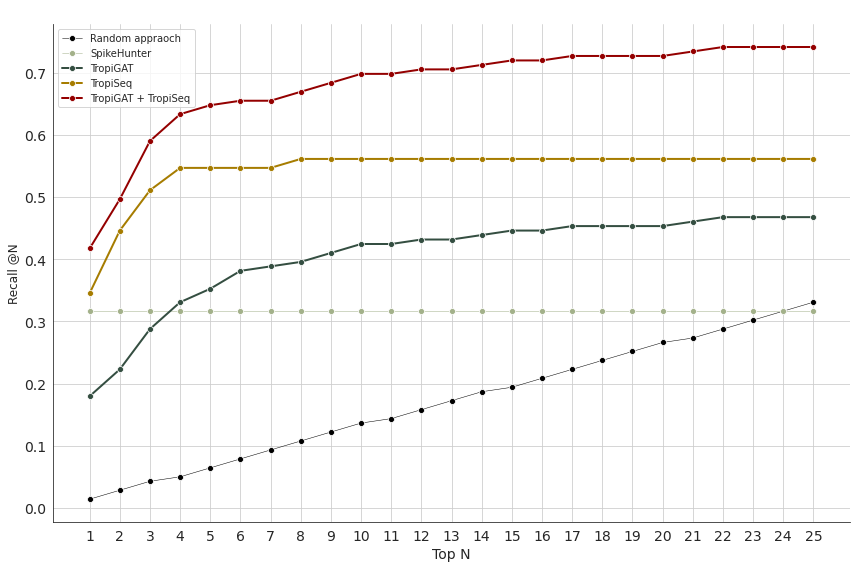

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns
# Define colors and line styles

sns.set_style("white")
sns.set_palette("muted")

# Plot each data series
plt.figure(figsize=(12, 8))
for label, series_info in dico_series.items():
    #values = series_info["values"]
    values = [num/139 for num in series_info["values"]]
    color = series_info["color"]
    bold = series_info["bold"]
    linestyle = '-' if bold else '-'
    linewidth = 2 if bold else 0.5
    sns.lineplot(x=range(1, len(values) + 1), y=values, label=label, marker='o', linestyle=linestyle, color=color, linewidth=linewidth, markersize=6)

# Customize the plot
plt.title(' ', fontsize=16)
plt.xlabel('Top N', fontsize=14)
plt.ylabel('Recall @N', fontsize=12)
plt.xticks(fontsize=14, rotation=0)  # Rotate x-axis tick labels horizontally
plt.yticks(fontsize=14)
plt.legend(loc='upper left', fontsize=10)
plt.grid(True)

# Adjust x-axis ticks to integers
plt.xticks(range(1, len(values) + 1))

# Adjust spines
sns.despine()

plt.tight_layout()
plt.savefig(f'{path_panels}/Recall@N.review.lytic.svg', dpi = 500)
plt.show()

***
### Get metrics: 

In [72]:
# Fold segregation: 
helices_results_bench_df = results_bench_df[results_bench_df["Folds"].isin(["triple-helix","right-handed beta-helix"])]
non_helice_results_df = results_bench_df[results_bench_df["Folds"].isin(["6-bladed beta-propeller"])]


In [119]:
non_helice_results_df["TropiSEQ_good_calls"].tolist()

['0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 'KL61',
 'KL37',
 'KL37',
 'KL37',
 'KL37',
 'KL37',
 'KL37',
 'KL37',
 'KL37',
 '0',
 '0',
 '0',
 '0',
 'KL61',
 'KL61',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 'KL11',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 'KL11',
 '0',
 'KL21',
 'KL37',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 'KL37',
 '0',
 '0',
 '0',
 '0',
 '0',
 'KL37',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 'KL61',
 '0',
 'KL66',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0']

> Full metrics: 

In [77]:
# Full dataset: 
#sorted_dic_tropigat, labels_tropigat, count_kltypes_tropigat = make_labels(results_bench_df, predictor = "tropigat", top_n = 40)
sorted_dic_tropigat_n, labels_tropigat_n, count_kltypes_tropigat_n = make_labels(results_bench_df, predictor = "tropigat_new", top_n = 40)
#sorted_dic_tropisage, labels_tropisage, count_kltypes_tropisage = make_labels(results_bench_df, predictor = "tropisage", top_n = 40)

sorted_dic_tropiseq, labels_tropiseq, count_kltypes_tropiseq = make_labels(results_bench_df, predictor = "tropiseq", top_n = 40)
#sorted_dic_tropilr, labels_tropilr, count_kltypes_tropilr = make_labels(results_bench_df, predictor = "tropilr", top_n = 40)
sorted_dic_tropish, labels_tropish, count_kltypes_sh = make_labels(results_bench_df, predictor = "spikehunter", top_n = 40)

tropigat_full_df = decript_dic(sorted_dic_tropigat, labels_tropigat, count_kltypes_tropigat, print_df=False)
tropigat_n_full_df = decript_dic(sorted_dic_tropigat_n, labels_tropigat_n, count_kltypes_tropigat_n, print_df=False)
tropisage_full_df = decript_dic(sorted_dic_tropisage, labels_tropisage, count_kltypes_tropisage, print_df=False)

tropiseq_full_df = decript_dic(sorted_dic_tropiseq, labels_tropiseq, count_kltypes_tropiseq, print_df=False)
tropilr_full_df = decript_dic(sorted_dic_tropilr, labels_tropilr, count_kltypes_tropilr, print_df=False)
tropish_full_df = decript_dic(sorted_dic_tropish, labels_tropish, count_kltypes_sh, print_df=False)

tropigat_full_df.to_csv(f"{path_benchmark}/TropiGAT.KL_metrics.full.tsv", sep = "\t", index = False, header = True)
tropigat_n_full_df.to_csv(f"{path_benchmark}/TropiGAT_new.KL_metrics.full.tsv", sep = "\t", index = False, header = True)
tropisage_full_df.to_csv(f"{path_benchmark}/TropiSAGE.KL_metrics.full.tsv", sep = "\t", index = False, header = True)

tropiseq_full_df.to_csv(f"{path_benchmark}/TropiSEQ.KL_metrics.full.tsv", sep = "\t", index = False, header = True)
tropilr_full_df.to_csv(f"{path_benchmark}/TropiLogReg.KL_metrics.full.tsv", sep = "\t", index = False, header = True)
tropish_full_df.to_csv(f"{path_benchmark}/SpikeHunter.KL_metrics.full.tsv", sep = "\t", index = False, header = True)

  0%|                                                    | 0/89 [00:00<?, ?it/s]


KeyError: 'TropiGAT_new_prediction'

> Comparative metrics, full: 

In [ ]:
comparative_full_df = pd.DataFrame({
            "KL type": tropigat_full_df["KL type"],
            "Count": tropigat_full_df["Count"],
            # recall
            "Recall_TropiGAT": tropigat_full_df["Recall"].round(3),
            "Recall_TropiGAT_n": tropigat_n_full_df["Recall"].round(3),
            "Recall_TropiSAGE": tropisage_full_df["Recall"].round(3),
            "Recall_TropiSEQ": tropiseq_full_df["Recall"].round(3),
            "Recall_TropiLogReg": tropilr_full_df["Recall"].round(3),
            "Recall_TropiSH": tropish_full_df["Recall"].round(3),
            # precision: 
            "Precision_TropiGAT": tropigat_full_df["Precision"].round(3),
            "Precision_TropiGAT_n": tropigat_n_full_df["Precision"].round(3),
            "Precision_TropiSAGE": tropisage_full_df["Precision"].round(3),
            "Precision_TropiLogReg": tropilr_full_df["Precision"].round(3),
            "Precision_TropiSEQ": tropiseq_full_df["Precision"].round(3),
            "Precision_TropiSH": tropish_full_df["Precision"].round(3),
            # MCC: 
            "MCC_TropiGAT": tropigat_full_df["MCC"].round(3),
            "MCC_TropiGAT_n": tropigat_n_full_df["MCC"].round(3),
            "MCC_TropiSAGE": tropisage_full_df["MCC"].round(3),
            "MCC_TropiLogReg": tropilr_full_df["MCC"].round(3),
            "MCC_TropiSEQ": tropiseq_full_df["MCC"].round(3),
            "MCC_TropiSH": tropish_full_df["MCC"].round(3),
        })

comparative_full_df = comparative_full_df.fillna("-")
comparative_full_df.to_csv(f"{path_benchmark}/Comparative.Full.tsv", sep = "\t", index = False, header = True)


In [ ]:
comparative_full_df

> Comparative metrics, helices:

In [124]:
from collections import Counter

Counter(helices_results_bench_df["Folds"])
helices_results_bench_df

,phage,protein,Folds,TropiGAT_new_UF_prediction,TropiGAT_new_UF_good_calls,TropiSEQ_prediction,TropiSEQ_good_calls,SpikeHunter_prediction,SpikeHunter_good_calls,Targets
0,A1a,A1a_00014,right-handed beta-helix,KL28:0.866 ; KL117:0.739 ; KL45:0.534,0,KL151:0.599 ; KL37:0.235 ; KL164:0.195 ; KL61:...,KL151,KL151,KL151,KL151
3,A1b,A1b_00048,right-handed beta-helix,KL28:0.961 ; KL71:0.959 ; KL157:0.927 ; KL155:...,KL157,KL157:0.469 ; KL37:0.235 ; KL164:0.195 ; KL61:...,KL157,KL157,KL157,KL157
4,A1c,A1c_00034,right-handed beta-helix,KL128:0.971 ; KL21:0.872 ; KL43:0.812 ; KL34:0...,0,No_hits,0,No_hits,0,KL1
7,A1d,A1d_00009,right-handed beta-helix,KL3:0.963 ; KL23:0.949 ; KL43:0.872 ; KL28:0.8...,0,KL112:0.497 ; KL37:0.235 ; KL164:0.195 ; KL61:...,0,KL112,0,KL20
9,A1g,A1g_00057,right-handed beta-helix,KL43:1.0 ; KL47:0.986 ; KL128:0.983 ; KL169:0....,0,No_hits,0,No_hits,0,KL16
...,...,...,...,...,...,...,...,...,...,...
234,S13a,S13a_00036,right-handed beta-helix,KL57:0.947 ; KL60:0.779 ; KL122:0.707 ; KL53:0...,0,KL38:0.38 ; KL37:0.235 ; KL164:0.195 ; KL61:0....,0,KL38,0,"KL102,KL149"
235,S13b,S13b_00058,right-handed beta-helix,KL47:0.996 ; KL34:0.961 ; KL26:0.906 ; KL64:0....,0,KL63:0.641 ; KL37:0.235 ; KL164:0.195 ; KL61:0...,KL63,No_hits,0,KL63
236,S13c,S13c_00055,right-handed beta-helix,KL38:0.95 ; KL123:0.854 ; KL127:0.786 ; KL27:0...,0,KL38:0.376 ; KL37:0.235 ; KL164:0.195 ; KL61:0...,0,KL38,0,"KL102,KL149"
237,S13d,S13d_00057,right-handed beta-helix,KL14:0.979 ; KL64:0.933 ; KL21:0.714 ; KL26:0....,KL14,KL14:0.951 ; KL64:0.307 ; KL164:0.195 ; KL61:0...,KL14,KL14,KL14,KL14


***
### Fold impact :

In [2]:
# Fold segregation: 
helices_results_bench_df = results_bench_df[results_bench_df["Folds"].isin(["triple-helix","right-handed beta-helix"])]
non_helice_results_df = results_bench_df[~results_bench_df["Folds"].isin(["triple-helix","right-handed beta-helix"])]


NameError: name 'results_bench_df' is not defined

In [21]:
def make_labels(pred_df, predictor = "tropigat" , top_n = 40, to_ignore = []) :
    dico_pred = {"tropigat" : "TropiGAT_prediction" ,
                 "tropigat_uf" : "TropiGAT_new_UF_prediction", 
                 "tropiseq" : "TropiSEQ_prediction", 
                 "tropiseq_uf" : "TropiSEQ_UF_prediction", 
                 "spikehunter" : "SpikeHunter_prediction", 
                 "tropigat_new" : "TropiGAT_new_prediction", 
                 "tropilr" : "TropiLogReg_prediction", 
                 "tropisage" : "TropiSAGE_prediction"}
    col = dico_pred[predictor]
    labels_tropigat = {}
    all_kl_types = set(kltype.strip() for row in results_bench_df["Targets"] for kltype in row.split(","))
    count_kltypes = {}
    dico_prophage_count = all_kl_types
    for kltype in tqdm(dico_prophage_count) : 
        n = 0
        pred_labels , real_labels = [] , []
        for author in dico_matrices :
            if kltype in dico_matrices[author]["pool"] : 
                matrix = dico_matrices[author]["matrix"]
                for phage in matrix["Phages"].unique() :
                    #if phage not in to_ignore : 
                    if phage not in to_ignore and phage in pred_df["phage"].tolist(): 
                        top_predictions = set()
                        predictions = pred_df[pred_df["phage"] == phage][col].values
                        for calls in predictions : 
                            if calls == "No hits" or calls == "No_hits":
                                predicted_kltypes = []
                            elif predictor == "spikehunter" :
                                predicted_kltypes = [x.split(":")[0].strip().replace("K", "KL") for x in calls.split(";")]
                            else :
                                predicted_kltypes = [x.split(":")[0].strip() for x in calls.split(";") if float(x.split(":")[1]) >= 0.5]
                            top_predictions.update(predicted_kltypes[0:top_n-1])
                        if kltype in top_predictions : 
                            pred_labels.append(1)
                        else : 
                            pred_labels.append(0)
                        if kltype in dico_hits[phage] : 
                            real_labels.append(1)
                            n += 1 
                        else :
                            real_labels.append(0)
        labels_tropigat[kltype] = {"y_pred" : pred_labels, "real_labels" : real_labels}
        sorted_dict = dict(sorted(labels_tropigat.items(), key=lambda item: int(item[0].split("KL")[1])))
        count_kltypes[kltype] = n 
    return sorted_dict , labels_tropigat, count_kltypes

In [20]:
# Helices:  
helices_results_bench_df = results_bench_df[results_bench_df["Folds"].isin(["triple-helix","right-handed beta-helix"])]

sorted_dic_tropigat_helices, labels_tropigat_helices, count_kltypes_tropigat_helices = make_labels(helices_results_bench_df, predictor = "tropigat_uf", top_n = 40)
sorted_dic_tropiseq_helices, labels_tropiseq_helices, count_kltypes_tropiseq_helices = make_labels(helices_results_bench_df, predictor = "tropiseq", top_n = 40)
sorted_dic_tropish_helices, labels_tropish_helices, count_kltypes_sh_helices = make_labels(helices_results_bench_df, predictor = "spikehunter", top_n = 40)

tropigat_helices_df = decript_dic(sorted_dic_tropigat_helices, labels_tropigat_helices, count_kltypes_tropigat_helices, print_df=False)
tropiseq_helices_df = decript_dic(sorted_dic_tropiseq_helices, labels_tropiseq_helices, count_kltypes_tropiseq_helices, print_df=False)
tropish_helices_df = decript_dic(sorted_dic_tropish_helices, labels_tropish_helices, count_kltypes_sh_helices, print_df=False)

tropigat_helices_df.to_csv(f"{path_benchmark}/TropiGAT.KL_metrics.helices.tsv", sep = "\t", index = False, header = True)
tropiseq_helices_df.to_csv(f"{path_benchmark}/TropiSEQ.KL_metrics.helices.tsv", sep = "\t", index = False, header = True)
tropish_helices_df.to_csv(f"{path_benchmark}/SpikeHunter.KL_metrics.helices.tsv", sep = "\t", index = False, header = True)


# Beta propeller : 
sorted_dic_tropigat_n_betaprop, labels_tropigat_n_betaprop, count_kltypes_tropigat_n_betaprop = make_labels(non_helice_results_df, predictor = "tropigat_uf", top_n = 40)
sorted_dic_tropiseq_betaprop, labels_tropiseq_betaprop, count_kltypes_tropiseq_betaprop = make_labels(non_helice_results_df, predictor = "tropiseq", top_n = 40)

tropigat_n_betaprop_df = decript_dic(sorted_dic_tropigat_n_betaprop, labels_tropigat_n_betaprop, count_kltypes_tropigat_n_betaprop, print_df=False)
tropiseq_betaprop_df = decript_dic(sorted_dic_tropiseq_betaprop, labels_tropiseq_betaprop, count_kltypes_tropiseq_betaprop, print_df=False)

tropigat_n_betaprop_df.to_csv(f"{path_benchmark}/TropiGAT_new.KL_metrics.betaprop.tsv", sep = "\t", index = False, header = True)
tropiseq_betaprop_df.to_csv(f"{path_benchmark}/TropiSEQ.KL_metrics.betaprop.tsv", sep = "\t", index = False, header = True)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 89/89 [00:00<00:00, 102.86it/s]
/media/concha-eloko/Linux/conda_envs/torch_geometric/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 89/89 [00:00<00:00, 167.03it/s]
/media/concha-eloko/Linux/conda_envs/torch_geometric/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

In [23]:
from statistics import mean

def get_MCC_raw(df) :
    mcc_scores = [row["MCC"] for _,row in df.iterrows() if isinstance(row["MCC"], (int, float))]
    return mcc_scores

def get_MCC(df):
    """
    Extract valid MCC scores from a dataframe, handling potential non-numeric values.
    Args:
        df: pandas DataFrame containing an 'MCC' column
    Returns:
        list: Valid MCC scores as floats
    """
    mcc_scores = []
    # Check if 'MCC' column exists
    if 'MCC' not in df.columns:
        raise KeyError("MCC column not found in dataframe")
        
    for _, row in df.iterrows():
        try:
            mcc = row['MCC']
            if pd.notnull(mcc) and (isinstance(mcc, (int, float))):
                mcc_scores.append(float(mcc))
        except Exception as e:
            continue
            
    return mcc_scores

def get_MCC_extraraw(df):
    """
    Calculate weighted MCC scores by multiplying each MCC value with its corresponding count.
    Args:
        df: pandas DataFrame containing 'Count' and 'MCC' columns
    Returns:
        list: Weighted MCC scores
    """
    mcc_scores = []
    # Check if required columns exist
    if 'MCC' not in df.columns or 'Count' not in df.columns:
        raise KeyError("Required columns (MCC and/or Count) not found in dataframe")
    # Iterate through rows of the dataframe
    for _, row in df.iterrows():
        try:
            mcc = row['MCC']
            count = row['Count']
            # Handle non-numeric MCC values
            if not isinstance(mcc, (int, float)) or pd.isna(mcc):
                mcc = 0
            # Handle non-numeric Count values
            if not isinstance(count, (int, float)) or pd.isna(count):
                count = 0
            raw_mcc = float(mcc) 
            mcc_scores.append(raw_mcc)
        except Exception as e:
            mcc_scores.append(0)
            
    return mcc_scores

mcc_helices_tropigat = get_MCC_extraraw(tropigat_helices_df)
mcc_helices_tropiseq = get_MCC_extraraw(tropiseq_helices_df)

mcc_prop_tropigat = get_MCC_extraraw(tropigat_n_betaprop_df)
mcc_prop_tropiseq = get_MCC_extraraw(tropiseq_betaprop_df)


In [17]:
good_calls_betaprop

defaultdict(list,
            {'TropiGAT_new_UF_good_calls': [('A1h',
               'A1h_00009',
               'KL13',
               '6-bladed beta-propeller',
               7),
              ('DJLANJJD',
               'DJLANJJD_00238',
               'KL57',
               '6-bladed beta-propeller',
               5),
              ('DJLANJJD',
               'DJLANJJD_00238',
               'KL4',
               '6-bladed beta-propeller',
               11),
              ('EHPPICDA',
               'EHPPICDA_00095',
               'KL57',
               '6-bladed beta-propeller',
               4),
              ('EKPIEFBL',
               'EKPIEFBL_00177',
               'KL57',
               '6-bladed beta-propeller',
               3),
              ('EKPIEFBL',
               'EKPIEFBL_00177',
               'KL4',
               '6-bladed beta-propeller',
               5),
              ('FADJDIKG',
               'FADJDIKG_00083',
               'KL57',
               '

In [16]:
t = 15

good_calls_betaprop = get_good_calls_extended(non_helice_results_df, threshold = t)


top_15_tropigat_ranks = [a[-1] for a in good_calls_betaprop["TropiGAT_new_UF_good_calls"]]
top_15_tropiseq_ranks = [a[-1] for a in good_calls_betaprop["TropiSEQ_good_calls"]]


mean(top_15_tropigat_ranks) , mean(top_15_tropiseq_ranks)

(6.34375, 4.2105263157894735)

In [196]:
Counter(non_helice_results_df["TropiSEQ_prediction"])

Counter({'KL102:0.737 ; KL7:0.448 ; KL37:0.235 ; KL164:0.195 ; KL61:0.188 ; KL109:0.183 ; KL66:0.182 ; KL143:0.179 ; KL11:0.178 ; KL113:0.178': 58,
         'KL60:0.486 ; KL37:0.235 ; KL164:0.195 ; KL61:0.188 ; KL109:0.183 ; KL66:0.182 ; KL143:0.179 ; KL11:0.178 ; KL113:0.178 ; KL137:0.173': 11,
         'No_hits': 4,
         'KL124:0.971 ; KL21:0.622 ; KL35:0.565 ; KL30:0.519 ; KL31:0.506 ; KL39:0.469 ; KL164:0.195 ; KL61:0.188 ; KL109:0.183 ; KL66:0.182': 1,
         'KL37:0.235 ; KL164:0.195 ; KL61:0.188 ; KL66:0.182 ; KL143:0.179 ; KL11:0.178 ; KL113:0.178 ; KL137:0.173 ; KL41:0.17 ; KL35:0.17': 1})

In [137]:
helices_results_bench_df = results_bench_df[results_bench_df["Folds"].isin(["triple-helix","right-handed beta-helix"])]
non_helice_results_df = results_bench_df[results_bench_df["Folds"].isin(["6-bladed beta-propeller"])]

t = 15

good_calls_extended = get_good_calls_extended(results_bench_df, threshold = t)
good_calls_helices = get_good_calls_extended(helices_results_bench_df, threshold = t)
good_calls_propeller = get_good_calls_extended(non_helice_results_df, threshold = t)

print("Propeller Folds :")
for predictor in good_calls_propeller :
    print(predictor, len(good_calls_propeller[predictor]))
    
print("\nHelices Folds :")
for predictor in good_calls_helices :
    print(predictor, len(good_calls_helices[predictor]))
    

Propeller Folds :
TropiGAT_new_UF_good_calls 32
TropiSEQ_good_calls 19

Helices Folds :
TropiGAT_new_UF_good_calls 62
TropiSEQ_good_calls 78
SpikeHunter_good_calls 44


In [174]:
def round_number(num) : 
    return round(num, 2)

#round_number(16/75*100) , round_number(78/164*100) 

round_number(32/75*100) , round_number(62/164*100) 

(42.67, 37.8)

In [240]:
from scipy import stats
import numpy as np

def compare_means(list1, list2, alpha=0.05):
    """
    Perform F-test for variance equality, then appropriate t-test to compare means.
    
    Args:
        list1 (list): First list of numbers
        list2 (list): Second list of numbers
        alpha (float): Significance level (default: 0.05)
        
    Returns:
        dict: Dictionary containing test results including:
            - f-statistic and its p-value
            - t-statistic and its p-value
            - means and variances of both lists
            - whether variances are equal
            - whether means are significantly different
            - which t-test was used
    """
    # Convert inputs to numpy arrays and remove any NaN values
    array1 = np.array(list1)
    array2 = np.array(list2)
    
    # Calculate variances
    var1 = np.var(array1, ddof=1)  # ddof=1 for sample variance
    var2 = np.var(array2, ddof=1)
    
    # Perform F-test for equality of variances
    f_stat = var1 / var2 if var1 > var2 else var2 / var1
    df1 = len(array1) - 1  # degrees of freedom for first sample
    df2 = len(array2) - 1  # degrees of freedom for second sample
    
    # Get p-value for F-test (two-tailed)
    f_p_value = 2 * min(1 - stats.f.cdf(f_stat, df1, df2),
                        stats.f.cdf(f_stat, df1, df2))
    
    # Determine if variances are equal
    equal_var = f_p_value >= alpha
    
    # Perform appropriate t-test
    if equal_var:
        t_stat, p_value = stats.ttest_ind(array1, array2, equal_var=True)
        test_type = "Student's t-test (equal variances)"
    else:
        t_stat, p_value = stats.ttest_ind(array1, array2, equal_var=False)
        test_type = "Welch's t-test (unequal variances)"
    
    # Calculate means
    mean1 = np.mean(array1)
    mean2 = np.mean(array2)
    
    return {
        'f_statistic': f_stat,
        'f_p_value': f_p_value,
        'variances_equal': equal_var,
        't_statistic': t_stat,
        't_p_value': p_value,
        'mean_list1': mean1,
        'mean_list2': mean2,
        'var_list1': var1,
        'var_list2': var2,
        'means_significantly_different': p_value < alpha,
        'test_used': test_type
    }

In [242]:
def get_MCC_extraraw(df):
    """
    Calculate weighted MCC scores by multiplying each MCC value with its corresponding count.
    
    Args:
        df: pandas DataFrame containing 'Count' and 'MCC' columns
        
    Returns:
        list: Weighted MCC scores
    """
    mcc_scores = []
    
    # Check if required columns exist
    if 'MCC' not in df.columns or 'Count' not in df.columns:
        raise KeyError("Required columns (MCC and/or Count) not found in dataframe")
    
    # Iterate through rows of the dataframe
    for _, row in df.iterrows():
        try:
            mcc = row['MCC']
            count = row['Count']
            
            # Handle non-numeric MCC values
            if not isinstance(mcc, (int, float)) or pd.isna(mcc):
                mcc = 0
                
            # Handle non-numeric Count values
            if not isinstance(count, (int, float)) or pd.isna(count):
                count = 0
                
            raw_mcc = float(mcc) 
            mcc_scores.append(raw_mcc)
            
        except Exception as e:
            mcc_scores.append(0)
            
    return mcc_scores

def get_weighted_MCC(df):
    """
    Calculate weighted MCC scores by multiplying each MCC value with its corresponding count.
    
    Args:
        df: pandas DataFrame containing 'Count' and 'MCC' columns
        
    Returns:
        list: Weighted MCC scores
    """
    mcc_scores = []
    
    # Check if required columns exist
    if 'MCC' not in df.columns or 'Count' not in df.columns:
        raise KeyError("Required columns (MCC and/or Count) not found in dataframe")
    
    # Iterate through rows of the dataframe
    for _, row in df.iterrows():
        try:
            mcc = row['MCC']
            count = row['Count']
            
            # Handle non-numeric MCC values
            if not isinstance(mcc, (int, float)) or pd.isna(mcc):
                mcc = 0
                
            # Handle non-numeric Count values
            if not isinstance(count, (int, float)) or pd.isna(count):
                count = 0
                
            weighted_mcc = float(mcc) * float(count)
            mcc_scores.append(weighted_mcc)
            
        except Exception as e:
            mcc_scores.append(0)
            
    return mcc_scores
        
mean(get_weighted_MCC(tropigat_helices_df)) , mean(get_MCC(tropigat_helices_df))

mean(get_weighted_MCC(tropigat_n_betaprop_df)) , mean(get_MCC(tropigat_n_betaprop_df))


#mean(get_weighted_MCC(tropiseq_helices_df)) , mean(get_MCC(tropiseq_helices_df))

(0.0761894880599952, 0.04212768155191615)

In [243]:
compare_means(get_MCC_extraraw(tropigat_helices_df) , get_MCC_extraraw(tropigat_n_betaprop_df))

{'f_statistic': 1.5620634908315272,
 'f_p_value': 0.05947856510414451,
 'variances_equal': True,
 't_statistic': 2.8240262172177486,
 't_p_value': 0.005378608390729821,
 'mean_list1': 0.09436686226358147,
 'mean_list2': 0.018234369626948785,
 'var_list1': 0.03260288939382139,
 'var_list2': 0.02087168004705495,
 'means_significantly_different': True,
 'test_used': "Student's t-test (equal variances)"}

In [244]:
compare_means(get_MCC_extraraw(tropiseq_helices_df) , get_MCC_extraraw(tropiseq_betaprop_df))

{'f_statistic': 22.566023168425964,
 'f_p_value': 2.220446049250313e-16,
 'variances_equal': False,
 't_statistic': 5.3057733836849374,
 't_p_value': 7.226266395147142e-07,
 'mean_list1': 0.19964307857414026,
 'mean_list2': 0.006514442771738952,
 'var_list1': 0.10899770086692867,
 'var_list2': 0.004830168791966703,
 'means_significantly_different': True,
 'test_used': "Welch's t-test (unequal variances)"}

In [1]:
tropigat_helices_df

NameError: name 'tropigat_helices_df' is not defined

In [224]:
tropigat_n_betaprop_df

,KL type,Count,F1,Accuracy,Recall,Precision,AUC,MCC
0,KL1,3,0.071429,0.573770,0.333333,0.040000,0.459770,-0.035378
1,KL2,12,0.000000,0.821918,0.000000,0.000000,0.491803,-0.052271
2,KL3,8,NaN,NaN,NaN,NaN,NaN,NaN
3,KL4,7,0.237288,0.134615,1.000000,0.134615,0.500000,0.000000
6,KL7,3,0.000000,0.550000,0.000000,0.000000,0.297297,-0.220564
...,...,...,...,...,...,...,...,...
80,KL134,1,NaN,NaN,NaN,NaN,NaN,NaN
84,KL144,2,NaN,NaN,NaN,NaN,NaN,NaN
86,KL151,1,0.000000,0.904762,0.000000,0.000000,0.475000,-0.050000
87,KL157,1,NaN,NaN,NaN,NaN,NaN,NaN


> Boxplots :

In [ ]:
mcc_helices_tropigat = get_MCC_extraraw(tropigat_helices_df)
mcc_helices_tropiseq = get_MCC_extraraw(tropiseq_helices_df)

mcc_prop_tropigat = get_MCC_extraraw(tropigat_n_betaprop_df)
mcc_prop_tropiseq = get_MCC_extraraw(tropiseq_betaprop_df)


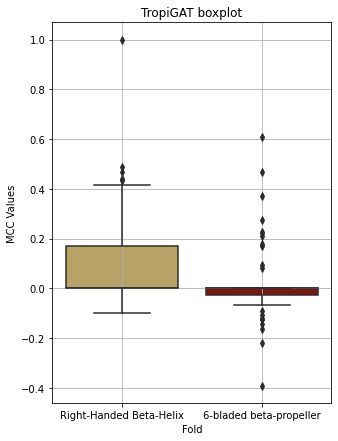

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Example data
data1 = mcc_helices_tropigat
data2 = mcc_prop_tropigat

# Combine data and corresponding labels
combined_data = np.concatenate([data1, data2])
labels = ['Right-Handed Beta-Helix'] * len(data1) + ['6-bladed beta-propeller'] * len(data2)

# Create box plot using Seaborn
plt.figure(figsize=(5, 7))
sns.boxplot(x=labels, y=combined_data, palette={'Right-Handed Beta-Helix': '#c6aa58ff', '6-bladed beta-propeller': '#8d0801ff'})

# Add labels and title
plt.xlabel('Fold')
plt.ylabel('MCC Values')
plt.title('TropiGAT boxplot')

# Show plot
plt.grid(True)
plt.savefig(f'{path_panels}/fold_box_plot.TropiGAT.reviewed.svg', dpi = 500)
plt.show()

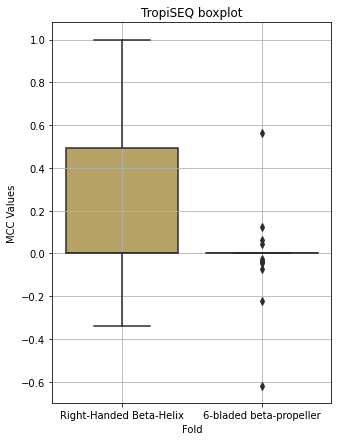

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Example data
data1 = mcc_helices_tropiseq
data2 = mcc_prop_tropiseq

# Combine data and corresponding labels
combined_data = np.concatenate([data1, data2])
labels = ['Right-Handed Beta-Helix'] * len(data1) + ['6-bladed beta-propeller'] * len(data2)

# Create box plot using Seaborn
plt.figure(figsize=(5, 7))
sns.boxplot(x=labels, y=combined_data, palette={'Right-Handed Beta-Helix': '#c6aa58ff', '6-bladed beta-propeller': '#8d0801ff'})

# Add labels and title
plt.xlabel('Fold')
plt.ylabel('MCC Values')
plt.title('TropiSEQ boxplot')

# Show plot
plt.grid(True)
plt.savefig(f'{path_panels}/fold_box_plot.TropiSEQ.reviewed.svg', dpi = 500)
plt.show()

In [194]:
len(get_MCC(tropigat_n_betaprop_df)) , len(get_MCC_raw(tropigat_helices_df))

nul = 0
positive = 0
negative = 0
nan = 0

for item in get_MCC_raw(tropigat_n_betaprop_df) :
    if isinstance(item , (int, float)) : 
        if item == 0.0 or item == 0 :
            nul += 1 
        elif item < 0 :
            negative += 1 
        else :
            positive += 1
    else : 
        nan += 1
            
nul , positive, negative, nan

(1, 49, 17, 0)

In [195]:
get_MCC_raw(tropigat_n_betaprop_df)

[-0.03537790870034883,
 -0.05227083734893167,
 nan,
 0.0,
 -0.22056438662814232,
 nan,
 nan,
 nan,
 nan,
 -0.16226969413320902,
 -0.3801726581436387,
 -0.06726727939963124,
 -0.03724856463036033,
 nan,
 -0.023769134427076417,
 0.27927927927927926,
 nan,
 -0.10397504898200727,
 -0.12289901003127189,
 0.1777046633277277,
 0.46637240216721393,
 nan,
 nan,
 0.09354143466934853,
 nan,
 nan,
 -0.07223151185146152,
 0.1720618004029213,
 nan,
 -0.12864083083132663,
 0.27399831217559545,
 nan,
 nan,
 nan,
 nan,
 nan,
 -0.03673591791853225,
 nan,
 nan,
 0.08006407690254357,
 0.3701780228629408,
 -0.12309149097933272,
 nan,
 0.6391263149222874,
 nan,
 nan,
 nan,
 -0.02564102564102564,
 0.2102722062854239,
 nan,
 nan,
 0.22487239817113244,
 nan,
 nan,
 -0.12361284651454937,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 -0.05,
 nan,
 nan]

In [221]:
[item for item in mcc_helices_tropigat if item >0 ]

[0.3303043991400771,
 0.14907119849998599,
 0.23949803205727466,
 0.24282146558931603,
 0.4334498677803327,
 0.3954372976473721,
 0.22681906103078386,
 0.24261672707004478,
 0.0825840139015334,
 0.2030905986149808,
 0.21966689613035442,
 0.43587300037912335,
 0.14862950508912245,
 0.487770465364315,
 0.12466910770584998,
 0.09133370363944028,
 0.06684480693860813,
 0.32582240849046523,
 0.15419152487578391,
 0.18038166015206336,
 0.09927337820337083,
 0.27773186030035396,
 0.17604469755488258,
 0.08703333689083328,
 0.2839372243904292,
 0.14184363653291035,
 0.16198789882296566,
 0.46825396825396826,
 0.30069184294819906,
 0.11619374420894563,
 0.41506984975750405,
 0.43852900965351466,
 0.375,
 1.0]

In [220]:
len([item for item in mcc_helices_tropigat if item >0 ])

34

In [176]:
round_number(mean(mcc_helices_tropigat)) , round_number(mean(mcc_helices_tropiseq)) , round_number(mean(mcc_prop_tropigat)) , round_number(mean(mcc_prop_tropiseq))

(0.16, 0.5, 0.04, 0.11)

In [217]:
len(mcc_prop_tropigat) , len(get_MCC_raw(tropigat_n_betaprop_df))

(29, 67)

In [213]:
mcc_prop_tropigat

[0.5623515948579824,
 -0.03857583749052298,
 -0.03673591791853225,
 -0.05057217374241736]

In [162]:
mcc_prop_tropiseq

[0.5623515948579824,
 -0.03857583749052298,
 -0.03673591791853225,
 -0.05057217374241736]

In [205]:
non_helice_results_df[non_helice_results_df["phage"] == "K41P2"]

,phage,protein,Folds,TropiGAT_new_UF_prediction,TropiGAT_new_UF_good_calls,TropiSEQ_prediction,TropiSEQ_good_calls,SpikeHunter_prediction,SpikeHunter_good_calls,Targets
132,K41P2,K41P2__cds_11,6-bladed beta-propeller,KL26:0.994 ; KL23:0.993 ; KL106:0.99 ; KL123:0...,KL39,KL60:0.486 ; KL37:0.235 ; KL164:0.195 ; KL61:0...,0,No_hits,0,"KL41,KL39"


In [211]:
non_helice_results_df

target_prop = []

for _, row in non_helice_results_df.iterrows() :
    target_prop = target_prop + row["Targets"].split(",")
    
len(set(target_prop))



67

In [201]:
Counter(non_helice_results_df["TropiSEQ_prediction"])

Counter({'KL102:0.737 ; KL7:0.448 ; KL37:0.235 ; KL164:0.195 ; KL61:0.188 ; KL109:0.183 ; KL66:0.182 ; KL143:0.179 ; KL11:0.178 ; KL113:0.178': 58,
         'KL60:0.486 ; KL37:0.235 ; KL164:0.195 ; KL61:0.188 ; KL109:0.183 ; KL66:0.182 ; KL143:0.179 ; KL11:0.178 ; KL113:0.178 ; KL137:0.173': 11,
         'No_hits': 4,
         'KL124:0.971 ; KL21:0.622 ; KL35:0.565 ; KL30:0.519 ; KL31:0.506 ; KL39:0.469 ; KL164:0.195 ; KL61:0.188 ; KL109:0.183 ; KL66:0.182': 1,
         'KL37:0.235 ; KL164:0.195 ; KL61:0.188 ; KL66:0.182 ; KL143:0.179 ; KL11:0.178 ; KL113:0.178 ; KL137:0.173 ; KL41:0.17 ; KL35:0.17': 1})

In [ ]:
# cluster 762 (58)
# cluster 274 (11)
# No_hits (4)

In [223]:
69/75

0.92

In [197]:
tropiseq_lytic_clusters = {'K10PH82C1__cds_49': 'No hits',
 'K13PH07C1L__cds_10': 'Dpo_cdhit_595',
 'K13PH07C1L__cds_11': 'Dpo_cdhit_62',
 'K13PH07C1L__cds_12': 'Dpo_cdhit_965',
 'K15PH90__cds_54': 'No hits',
 'K18PH07C1__cds_243': 'Dpo_cdhit_626',
 'K18PH07C1__cds_245': 'Dpo_cdhit_379',
 'K22PH164C1__cds_11': 'No hits',
 'K30lambda2_2__cds_152': 'No hits',
 'K30lambda2_2__cds_20': 'No hits',
 'K32PH164C1__cds_151': 'No hits',
 'K32PH164C1__cds_20': 'No hits',
 'K34PH164__cds_24': 'No hits',
 'K41P2__cds_227': 'No hits',
 'K49PH164C2__cds_24': 'No hits',
 'K65PH164__cds_198': 'No hits',
 'K70PH128C1__cds_24': 'No hits',
 'K7PH164C4__cds_151': 'No hits',
 'K7PH164C4__cds_20': 'No hits',
 'K17alfa62__cds_66_A_281-682': 'Dpo_cdhit_88',
 'K14PH164C1__cds_24_A_4_221_871.pdb': 'Dpo_cdhit_92',
 'K64PH164C4__cds_24_A_4_178_852.pdb': 'Dpo_cdhit_56',
 'K40PH129C1__cds_56_A_4_239_860.pdb': 'No hits',
 'K51PH129C1__cds_9_A_1_92_787.pdb': 'Dpo_cdhit_47',
 'K15PH90__cds_55_A.pdb': 'Dpo_cdhit_182',
 'K21lambda1__cds_28_A.pdb': 'Dpo_cdhit_336',
 'K26PH128C1__cds_50_A_1_97_595.pdb': 'Dpo_cdhit_87',
 'K35PH164C3__cds_48_A_4_282_728.pdb': 'Dpo_cdhit_352',
 'K37PH164C1__cds_47_A_1_1_307.pdb': 'Dpo_cdhit_599',
 'K38PH09C2__cds_24_A_4_178_672.pdb': 'Dpo_cdhit_76',
 'K27PH129C1__cds_48_A_7_200_648.pdb': 'Dpo_cdhit_268',
 'K5lambda5__cds_198_A_3_173_674.pdb': 'Dpo_cdhit_104',
 'K41P2__cds_11_A_7_188_506.pdb': 'Dpo_cdhit_274',
 'K43PH164C1__cds_40_A_3_296_718.pdb': 'Dpo_cdhit_311',
 'K11PH164C1__cds_46_A_1_1_416.pdb': 'Dpo_cdhit_429',
 'K17alfa62__cds_64_A_3_129_548.pdb': 'Dpo_cdhit_362',
 'K2PH164C1__cds_23_A_6_269_664.pdb': 'No hits',
 'K2alfa62__cds_23_A_6_269_671.pdb': 'No hits',
 'K56PH164C1__cds_48_A_5_293_702.pdb': 'No hits',
 'K82P1__cds_45_A_5_292_704.pdb': 'No hits',
 'K66PH128C1__cds_59_A_4_252_713.pdb': 'Dpo_cdhit_284',
 'K23PH08C2__cds_233_A_2_76_514.pdb': 'Dpo_cdhit_235',
 'K60PH164C1__cds_96_A_6_321_703.pdb': 'Dpo_cdhit_9',
 'K56PH164C1__cds_49_A_3_110_475.pdb': 'Dpo_cdhit_295',
 'K74PH129C2__cds_52_A_2_34_431.pdb': 'Dpo_cdhit_391',
 'K8PH128__cds_46_A_5_294_719.pdb': 'No hits',
 'K44PH129C1__cds_9_A_2_39_391.pdb': 'Dpo_cdhit_599',
 'K22PH164C1__cds_10_A_1_1_368.pdb': 'Dpo_cdhit_599',
 'K24PH164C1__cds_8_A_2_85_402.pdb': 'Dpo_cdhit_71',
 'K48PH164C1__cds_49_A_3_306_628.pdb': 'Dpo_cdhit_261',
 'K25PH129C1__cds_60_A_5_311_671.pdb': 'Dpo_cdhit_487',
 'K39PH122C2__cds_55_A_5_286_658.pdb': 'Dpo_cdhit_421',
 'K39PH122C2__cds_8_A_4_33_387.pdb': 'Dpo_cdhit_595',
 'K13PH07C1S__cds_10_A_7_32_375.pdb': 'Dpo_cdhit_595',
 'K61PH164C1__cds_9_A_1_1_387.pdb': 'Dpo_cdhit_513',
 'K46PH129__cds_24_A_8_222_596.pdb': 'Dpo_cdhit_269',
 'K60PH164C1__cds_94_A_3_119_467.pdb': 'Dpo_cdhit_528',
 'K5lambda5__cds_196_A_4_457_808.pdb': 'Dpo_cdhit_528',
 'K43PH164C1__cds_41_A_3_32_385.pdb': 'Dpo_cdhit_528',
 'K57lambda1_2__cds_92_A_3_120_506.pdb': 'Dpo_cdhit_429',
 'K61PH164C1__cds_10_A_3_80_443.pdb': 'Dpo_cdhit_508',
 'K71PH129C1__cds_55_A_5_295_682.pdb': 'Dpo_cdhit_389',
 'K45PH128C2__cds_237_A_3_76_463.pdb': 'Dpo_cdhit_389',
 'K80PH1317b__cds_54_A_2_36_354.pdb': 'Dpo_cdhit_639',
 'K80PH1317a__cds_54_A_2_36_354.pdb': 'Dpo_cdhit_639',
 'K82P1__cds_46_A_2_94_449.pdb': 'Dpo_cdhit_488',
 'K11PH164C1__cds_45_A_5_356_700.pdb': 'Dpo_cdhit_464',
 'K45PH128C2__cds_239_A_1_186_411.pdb': 'Dpo_cdhit_884',
 'K4PH164__cds_22_A_1_53_402.pdb': 'Dpo_cdhit_730',
 'K53PH164C2__cds_24_A_4_200_777.pdb': 'Dpo_cdhit_58',
 'K54lambda1_1_1__cds_238_A_1_78_646.pdb': 'Dpo_cdhit_120',
 'K57lambda1_2__cds_93_A_4_251_900.pdb': 'Dpo_cdhit_230',
 'K58PH129C2__cds_47_A_2_38_516.pdb': 'Dpo_cdhit_188',
 'K16PH164C3__cds_48_A_3_292_776.pdb': 'Dpo_cdhit_231',
 'K17alfa61__cds_23_A_4_179_630.pdb': 'No hits',
 'K1PH164C1__cds_8_A_2_69_559.pdb': 'No hits',
 'K44PH129C1__cds_10_A_3_35_538.pdb': 'Dpo_cdhit_190',
 'K63PH128__cds_22_A_5_260_714.pdb': 'Dpo_cdhit_303',
 'K5lambda5__cds_199_A_2_109_658.pdb': 'No hits',
 'K10PH82C1__cds_50_A_5_301_819.pdb': 'No hits',
 'K74PH129C2__cds_51_A_3_291_808.pdb': 'Dpo_cdhit_14',
 'K26PH128C1__cds_49_A_3_291_808.pdb': 'Dpo_cdhit_14',
 'K65PH164__cds_12_A_5_181_627.pdb': 'Dpo_cdhit_274',
 'K6PH25C3__cds_23_A_3_206_691.pdb': 'Dpo_cdhit_198',
 'K80PH1317a__cds_52_A_5_302_576.pdb': 'Dpo_cdhit_246',
 'K80PH1317a__cds_53_A.pdb': 'Dpo_cdhit_14',
 'K80PH1317b__cds_52_A_5_302_606.pdb': 'Dpo_cdhit_246',
 'K2PH164C2__cds_24_A_6_274_608.pdb': 'Dpo_cdhit_625',
 'K10PH82C1__cds_51_A_2_38_368.pdb': 'Dpo_cdhit_611',
 'K13PH07C1S__cds_11_A_2_93_430.pdb': 'Dpo_cdhit_521',
 'K37PH164C1__cds_48_A_2_37_367.pdb': 'Dpo_cdhit_521',
 'K54lambda2__cds_23_A_7_214_582.pdb': 'No hits',
 'K5lambda5__cds_200_A_2_111_443.pdb': 'Dpo_cdhit_180',
 'K80PH1317b__cds_53_A.pdb': 'Dpo_cdhit_14',
 'K10PH82C1 cds_45': 'Dpo_cdhit_762',
 'K11PH164C1 cds_39': 'Dpo_cdhit_762',
 'K12P1_1 cds_43': 'Dpo_cdhit_762',
 'K13PH07C1L cds_54': 'Dpo_cdhit_762',
 'K13PH07C1S cds_53': 'Dpo_cdhit_762',
 'K15PH90 cds_49': 'Dpo_cdhit_762',
 'K16PH164C3 cds_43': 'Dpo_cdhit_762',
 'K19PH14C4P1 cds_43': 'Dpo_cdhit_762',
 'K1PH164C1 cds_53': 'Dpo_cdhit_762',
 'K2069PH1 cds_25': 'No hits',
 'K22PH164C1 cds_50': 'Dpo_cdhit_762',
 'K24PH164C1 cds_55': 'Dpo_cdhit_762',
 'K25PH129C1 cds_56': 'Dpo_cdhit_762',
 'K26PH128C1 cds_44': 'Dpo_cdhit_762',
 'K27PH129C1 cds_43': 'Dpo_cdhit_762',
 'K35PH164C3 cds_43': 'Dpo_cdhit_762',
 'K37PH164C1 cds_41': 'Dpo_cdhit_762',
 'K39PH122C2 cds_50': 'Dpo_cdhit_762',
 'K40PH129C1 cds_52': 'Dpo_cdhit_762',
 'K42PH8 cds_43': 'Dpo_cdhit_762',
 'K42PH8 cds_48': 'Dpo_cdhit_144',
 'K43PH164C1 cds_35': 'Dpo_cdhit_762',
 'K44PH129C1 cds_45': 'Dpo_cdhit_762',
 'K48PH164C1 cds_43': 'Dpo_cdhit_762',
 'K51PH129C1 cds_56': 'Dpo_cdhit_762',
 'K56PH164C1 cds_43': 'Dpo_cdhit_762',
 'K58PH129C2 cds_40': 'Dpo_cdhit_762',
 'K59PH2 cds_46': 'Dpo_cdhit_762',
 'K61PH164C1 cds_52': 'Dpo_cdhit_762',
 'K66PH128C1 cds_55': 'Dpo_cdhit_762',
 'K71PH129C1 cds_51': 'Dpo_cdhit_762',
 'K72PH164C2 cds_51': 'Dpo_cdhit_762',
 'K74PH129C2 cds_46': 'Dpo_cdhit_762',
 'K80PH1317a cds_47': 'Dpo_cdhit_762',
 'K80PH1317b cds_47': 'Dpo_cdhit_762',
 'K82P1 cds_40': 'Dpo_cdhit_762',
 'K8PH128 cds_41': 'Dpo_cdhit_762',
 'K72PH164C2 cds_55': 'Dpo_cdhit_243',
 'K33PH14C2 cds_55': 'No hits',
 'K33PH14C2 cds_25': 'No hits',
 'K31PH164 cds_25': 'No hits',
 'K52PH129C1 cds_25': 'No hits',
 'K69PH164C2 cds_24': 'No hits',
 'K28PH129 cds_24': 'No hits',
 'K2064PH2 cds_25': 'No hits',
 'K19PH14C4P1 cds_48': 'No hits',
 'K50PH164C1 cds_28': 'No hits',
 'K29PH164C1 cds_25': 'No hits',
 'K62PH164C2 cds_25': 'No hits',
 'K9PH25C2 cds_76': 'Dpo_cdhit_775',
 'EHPPICDA_00095': 'Dpo_cdhit_274',
 'DIMCIIMF_00039': 'No hits',
 'DIMCIIMF_00240': 'Dpo_cdhit_274',
 'OBHDAGOG_00029': 'No hits',
 'LCALLHIG_00050': 'Dpo_cdhit_319',
 'HIIECEMK_00043': 'Dpo_cdhit_762',
 'HIIECEMK_00054': 'Dpo_cdhit_62',
 'GCLPFEGH_00240': 'Dpo_cdhit_274',
 'IPGJFKPH_00198': 'Dpo_cdhit_274',
 'POFPNCPI_00246': 'Dpo_cdhit_274',
 'INMBNBLA_00138': 'Dpo_cdhit_274',
 'INMBNBLA_00202': 'No hits',
 'OPBIHMGG_00067': 'Dpo_cdhit_319',
 'BLCJPOBP_00041': 'Dpo_cdhit_762',
 'FADJDIKG_00019': 'No hits',
 'FADJDIKG_00083': 'Dpo_cdhit_274',
 'PP187_gp225': 'Dpo_cdhit_232',
 'PP187_gp227': 'Dpo_cdhit_355',
 'PP187_gp230': 'Dpo_cdhit_764',
 'PP187_gp233': 'Dpo_cdhit_652',
 'PP187_gp235': 'Dpo_cdhit_611',
 'PP187_gp237': 'Dpo_cdhit_272',
 'PP187_gp239': 'Dpo_cdhit_231',
 'KBDEFBCI_00052': 'Dpo_cdhit_352',
 'KBDEFBCI_00054': 'Dpo_cdhit_421',
 'KBDEFBCI_00056': 'Dpo_cdhit_179',
 'KBDEFBCI_00058': 'Dpo_cdhit_413',
 'LLOFRUDD_00039': 'No hits',
 'DJLANJJD_00238': 'Dpo_cdhit_274',
 'NEBGPKAL_00001': 'No hits',
 'NEBGPKAL_00013': 'Dpo_cdhit_762',
 'EKPIEFBL_00113': 'No hits',
 'EKPIEFBL_00177': 'Dpo_cdhit_274',
 'EONHMLJF_00087': 'No hits',
 'NJHLHPIG_00055': 'Dpo_cdhit_352',
 'NJHLHPIG_00057': 'Dpo_cdhit_421',
 'NJHLHPIG_00059': 'No hits',
 'NJHLHPIG_00061': 'Dpo_cdhit_413',
 'PFOEGONH_00078': 'Dpo_cdhit_319',
 'NBNDMPCG_00161': 'Dpo_cdhit_352',
 'NBNDMPCG_00163': 'Dpo_cdhit_589',
 'NBNDMPCG_00165': 'No hits',
 'NBNDMPCG_00166': 'Dpo_cdhit_53',
 'NBNDMPCG_00168': 'Dpo_cdhit_375',
 'S13c_00055': 'Dpo_cdhit_106',
 'S10a_00097': 'Dpo_cdhit_406',
 'A1o_00041': 'Dpo_cdhit_762',
 'A1o_00045': 'Dpo_cdhit_421',
 'A1c_00034': 'No hits',
 'A1c_00046': 'Dpo_cdhit_762',
 'A1d_00009': 'Dpo_cdhit_213',
 'A1d_00013': 'Dpo_cdhit_762',
 'A1q_00010': 'Dpo_cdhit_676',
 'A1q_00019': 'Dpo_cdhit_421',
 'A1q_00023': 'Dpo_cdhit_762',
 'A1r_00009': 'Dpo_cdhit_421',
 'A1r_00013': 'Dpo_cdhit_762',
 'P4a_00011': 'Dpo_cdhit_635',
 'P4a_00013': 'Dpo_cdhit_306',
 'A1f_00012': 'Dpo_cdhit_71',
 'A1f_00024': 'Dpo_cdhit_762',
 'A1g_00045': 'Dpo_cdhit_762',
 'A1g_00057': 'No hits',
 'A3b_00016': 'Dpo_cdhit_762',
 'A3b_00021': 'Dpo_cdhit_594',
 'A1j_00002': 'Dpo_cdhit_762',
 'A1j_00040': 'Dpo_cdhit_31',
 'A1j_00049': 'Dpo_cdhit_82',
 'A2a_00010': 'Dpo_cdhit_762',
 'A2a_00049': 'Dpo_cdhit_31',
 'A1m_00045': 'Dpo_cdhit_762',
 'A1m_00049': 'Dpo_cdhit_421',
 'D7b_00043': 'Dpo_cdhit_547',
 'A1n_00050': 'Dpo_cdhit_762',
 'A1p_00055': 'Dpo_cdhit_762',
 'A3d_00036': 'Dpo_cdhit_762',
 'A3d_00041': 'Dpo_cdhit_43',
 'A3d_00042': 'Dpo_cdhit_513',
 'S13a_00036': 'Dpo_cdhit_441',
 'A3c_00039': 'Dpo_cdhit_762',
 'A3c_00044': 'Dpo_cdhit_464',
 'A3c_00045': 'Dpo_cdhit_513',
 'A1l_00005': 'Dpo_cdhit_762',
 'A1l_00058': 'Dpo_cdhit_954',
 'A3a_00002': 'Dpo_cdhit_38',
 'A3a_00045': 'Dpo_cdhit_762',
 'A2b_00008': 'Dpo_cdhit_31',
 'A2b_00022': 'Dpo_cdhit_762',
 'M5a_00170': 'Dpo_cdhit_286',
 'M5a_00175': 'No hits',
 'A1b_00036': 'Dpo_cdhit_762',
 'A1b_00048': 'Dpo_cdhit_61',
 'A1e_00012': 'Dpo_cdhit_71',
 'A1e_00024': 'Dpo_cdhit_762',
 'S11a_00036': 'Dpo_cdhit_406',
 'A1a_00002': 'Dpo_cdhit_762',
 'A1a_00014': 'Dpo_cdhit_508',
 'P4b_00023': 'Dpo_cdhit_306',
 'P4b_00025': 'Dpo_cdhit_635',
 'S13e_00021': 'Dpo_cdhit_297',
 'S13d_00057': 'Dpo_cdhit_53',
 'A1h_00009': 'Dpo_cdhit_762',
 'A1h_00013': 'Dpo_cdhit_501',
 'A1h_00021': 'Dpo_cdhit_586',
 'A1k_00014': 'Dpo_cdhit_421',
 'A1k_00018': 'Dpo_cdhit_762',
 'D7c_00007': 'Dpo_cdhit_73',
 'S13b_00058': 'Dpo_cdhit_303',
 'M5b_00086': 'Dpo_cdhit_479',
 'M12a_00031': 'Dpo_cdhit_468',
 'A2a_b_00022': 'Dpo_cdhit_31',
 'A2a_b_00036': 'Dpo_cdhit_762',
 'A1i_00037': 'Dpo_cdhit_762',
 'A1i_00041': 'Dpo_cdhit_501',
 'A1i_00049': 'Dpo_cdhit_31'}

In [199]:
cluters_lytoc = [value for key, value in tropiseq_lytic_clusters.items()]
Counter(cluters_lytoc)

Counter({'Dpo_cdhit_762': 63,
         'No hits': 50,
         'Dpo_cdhit_274': 11,
         'Dpo_cdhit_421': 8,
         'Dpo_cdhit_31': 5,
         'Dpo_cdhit_352': 4,
         'Dpo_cdhit_14': 4,
         'Dpo_cdhit_595': 3,
         'Dpo_cdhit_599': 3,
         'Dpo_cdhit_71': 3,
         'Dpo_cdhit_513': 3,
         'Dpo_cdhit_528': 3,
         'Dpo_cdhit_319': 3,
         'Dpo_cdhit_62': 2,
         'Dpo_cdhit_429': 2,
         'Dpo_cdhit_508': 2,
         'Dpo_cdhit_389': 2,
         'Dpo_cdhit_639': 2,
         'Dpo_cdhit_464': 2,
         'Dpo_cdhit_231': 2,
         'Dpo_cdhit_303': 2,
         'Dpo_cdhit_246': 2,
         'Dpo_cdhit_611': 2,
         'Dpo_cdhit_521': 2,
         'Dpo_cdhit_413': 2,
         'Dpo_cdhit_53': 2,
         'Dpo_cdhit_406': 2,
         'Dpo_cdhit_635': 2,
         'Dpo_cdhit_306': 2,
         'Dpo_cdhit_501': 2,
         'Dpo_cdhit_965': 1,
         'Dpo_cdhit_626': 1,
         'Dpo_cdhit_379': 1,
         'Dpo_cdhit_88': 1,
         'Dpo_cdhit_92'

In [142]:
tropigat_helices_df

,KL type,Count,F1,Accuracy,Recall,Precision,AUC,MCC
0,KL1,3,0.0,0.960000,0.000000,0.000000,0.494845,-0.017675
1,KL2,11,0.4,0.868421,0.454545,0.357143,0.683583,0.330304
2,KL3,7,0.5,0.571429,0.428571,0.600000,0.571429,0.149071
3,KL4,2,0.0,0.790123,0.000000,0.000000,0.405063,-0.075853
4,KL5,1,0.0,0.925373,0.000000,0.000000,0.469697,-0.031016
...,...,...,...,...,...,...,...,...
83,KL140,3,NaN,NaN,NaN,NaN,NaN,NaN
85,KL149,2,0.0,0.818182,0.000000,0.000000,0.435484,-0.094333
86,KL151,1,NaN,NaN,NaN,NaN,NaN,NaN
87,KL157,1,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [143]:
tropiseq_helices_df

,KL type,Count,F1,Accuracy,Recall,Precision,AUC,MCC
0,KL1,3,NaN,NaN,NaN,NaN,NaN,NaN
1,KL2,11,0.428571,0.929825,0.272727,1.0,0.636364,0.503062
2,KL3,7,0.600000,0.714286,0.428571,1.0,0.714286,0.522233
3,KL4,2,NaN,NaN,NaN,NaN,NaN,NaN
4,KL5,1,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
83,KL140,3,NaN,NaN,NaN,NaN,NaN,NaN
85,KL149,2,NaN,NaN,NaN,NaN,NaN,NaN
86,KL151,1,1.000000,1.000000,1.000000,1.0,1.000000,1.000000
87,KL157,1,NaN,NaN,NaN,NaN,NaN,NaN


In [168]:
list(zip(tropiseq_betaprop_df["KL type"], tropiseq_betaprop_df["MCC"]))

tropiseq_betaprop_df[tropiseq_betaprop_df["KL type"] == "KL21"]

,KL type,Count,F1,Accuracy,Recall,Precision,AUC,MCC
20,KL21,3,0.5,0.95,0.333333,1.0,0.666667,0.562352


In [170]:
list(zip(tropigat_n_betaprop_df["KL type"], tropigat_n_betaprop_df["MCC"]))


[('KL1', -0.03537790870034883),
 ('KL2', -0.05227083734893167),
 ('KL3', nan),
 ('KL4', 0.0),
 ('KL7', -0.22056438662814232),
 ('KL8', nan),
 ('KL10', nan),
 ('KL11', nan),
 ('KL12', nan),
 ('KL13', -0.16226969413320902),
 ('KL14', -0.3801726581436387),
 ('KL15', -0.06726727939963124),
 ('KL16', -0.03724856463036033),
 ('KL19', nan),
 ('KL20', -0.023769134427076417),
 ('KL21', 0.27927927927927926),
 ('KL22', nan),
 ('KL24', -0.10397504898200727),
 ('KL25', -0.12289901003127189),
 ('KL26', 0.1777046633277277),
 ('KL27', 0.46637240216721393),
 ('KL28', nan),
 ('KL29', nan),
 ('KL30', 0.09354143466934853),
 ('KL31', nan),
 ('KL32', nan),
 ('KL35', -0.07223151185146152),
 ('KL36', 0.1720618004029213),
 ('KL37', nan),
 ('KL38', -0.12864083083132663),
 ('KL39', 0.27399831217559545),
 ('KL40', nan),
 ('KL41', nan),
 ('KL42', nan),
 ('KL43', nan),
 ('KL44', nan),
 ('KL47', -0.03673591791853225),
 ('KL48', nan),
 ('KL50', nan),
 ('KL51', 0.08006407690254357),
 ('KL52', 0.3701780228629408),
 ('K

In [173]:
tropigat_n_betaprop_df[tropigat_n_betaprop_df["KL type"] == "KL57"]

,KL type,Count,F1,Accuracy,Recall,Precision,AUC,MCC
56,KL57,9,0.695652,0.865385,0.888889,0.571429,0.874677,0.639126


In [ ]:
comparative_helices_df = pd.DataFrame({
            "KL type": tropigat_helices_df["KL type"],
            "Count": tropigat_helices_df["Count"],
            # recall
            "Recall_TropiGAT": tropigat_helices_df["Recall"].round(3),
            "Recall_TropiSEQ": tropiseq_helices_df["Recall"].round(3),
            "Recall_TropiSH": tropish_helices_df["Recall"].round(3),
            # precision: 
            "Precision_TropiGAT": tropigat_helices_df["Precision"].round(3),
            "Precision_TropiSEQ": tropiseq_helices_df["Precision"].round(3),
            "Precision_TropiSH": tropish_helices_df["Precision"].round(3),
            # MCC: 
            "MCC_TropiGAT": tropigat_helices_df["MCC"].round(3),
            "MCC_TropiSEQ": tropiseq_helices_df["MCC"].round(3),
            "MCC_TropiSH": tropish_helices_df["MCC"].round(3),
        })

comparative_helices_df = comparative_helices_df.fillna("-")
comparative_helices_df.to_csv(f"{path_benchmark}/Comparative.Helices.tsv", sep = "\t", index = False, header = True)

In [ ]:
comparative_helices_df

***
### Experimentally validated depolymerase results: 

In [3]:
# regular filtration: 
#tropigat_pred_xp_df = pd.read_csv(f"{path_benchmark}/TropiGAT.exp_val_depolymerase.tsv", sep = "\t", names = ["protein", "TropiGAT_prediction"])
tropigat_new_pred_xp_df = pd.read_csv(f"{path_benchmark}/TropiGAT_new.review.exp_val_depolymerase.tsv", sep = "\t", names = ["protein", "TropiGAT_new_prediction"])
#tropigat_no_heads_pred_xp_df = pd.read_csv(f"{path_benchmark}/TropiGAT_no_heads.review.exp_val_depolymerase.tsv", sep = "\t", names = ["protein", "TropiGAT_no_heads_prediction"])


tropisage_pred_xp_df = pd.read_csv(f"{path_benchmark}/TropiSAGE.review.exp_val_depolymerase.tsv", sep = "\t", names = ["protein", "TropiSAGE_prediction"])

tropiseq_pred_xp_df = pd.read_csv(f"{path_benchmark}/TropiSEQ.p_05.exp_val_depolymerase.tsv", sep = "\t", names = ["protein", "TropiSEQ_prediction"])
tropilr_pred_xp_df = pd.read_csv(f"{path_benchmark}/TropiLogReg.exp_val_depolymerase.tsv", sep = "\t", names = ["protein", "TropiLR_prediction"])

# Ultra filtration: 
tropigat_new_pred_xp_df_uf = pd.read_csv(f"{path_benchmark}/TropiGAT_new_UF.review.exp_val_depolymerase.tsv", sep = "\t", names = ["protein", "TropiGAT_UF_prediction"])
tropisage_pred_xp_df_uf = pd.read_csv(f"{path_benchmark}/TropiSAGE_UF.review.exp_val_depolymerase.tsv", sep = "\t", names = ["protein", "TropiSAGE_UF_prediction"])

tropiseq_pred_xp_df_uf = pd.read_csv(f"{path_benchmark}/TropiSEQ_UF_70.p_05.exp_val_depolymerase.tsv", sep = "\t", names = ["protein", "TropiSEQ_UF_prediction"])
#tropilr_pred_xp_df = pd.read_csv(f"{path_benchmark}/TropiLogReg.exp_val_depolymerase.tsv", sep = "\t", names = ["protein", "prediction"])

# SpikeHunter
SH_pred_xp_df = pd.read_csv(f"{path_benchmark}/SpikeHunter_predictions.exp_val_depolymerase.tsv", sep = "\t", names = ["protein", "SpikeHunter_prediction"])
SH_pred_xp_df["SpikeHunter_prediction"] = SH_pred_xp_df["SpikeHunter_prediction"].apply(lambda x : x.replace("K", "KL"))


> Add metadata: 

In [4]:
info_depo = pd.read_csv(f"{path_benchmark}/exp_val_depolymerase.tsv", sep = "\t", header = 0)


In [5]:
#merged_df = tropigat_pred_xp_df.merge(tropigat_new_pred_xp_df, on='protein', how='inner').merge(tropisage_pred_xp_df, on='protein', how='inner').merge(tropiseq_pred_xp_df, on='protein', how='inner').merge(tropigat_new_pred_xp_df_uf, on='protein', how='inner').merge(tropisage_pred_xp_df_uf, on='protein', how='inner').merge(tropiseq_pred_xp_df_uf, on='protein', how='inner').merge(SH_pred_xp_df, on='protein', how='inner').merge(tropigat_no_heads_pred_xp_df, on='protein', how='inner').merge(tropilr_pred_xp_df, on='protein', how='inner')
#merged_df = tropigat_pred_xp_df.merge(tropigat_new_pred_xp_df, on='protein', how='inner').merge(tropisage_pred_xp_df, on='protein', how='inner').merge(tropiseq_pred_xp_df, on='protein', how='inner').merge(tropigat_new_pred_xp_df_uf, on='protein', how='inner').merge(tropisage_pred_xp_df_uf, on='protein', how='inner').merge(tropiseq_pred_xp_df_uf, on='protein', how='inner').merge(SH_pred_xp_df, on='protein', how='inner').merge(tropilr_pred_xp_df, on='protein', how='inner')
merged_df = tropigat_new_pred_xp_df.merge(tropisage_pred_xp_df, on='protein', how='inner').merge(tropiseq_pred_xp_df, on='protein', how='inner').merge(tropigat_new_pred_xp_df_uf, on='protein', how='inner').merge(tropisage_pred_xp_df_uf, on='protein', how='inner').merge(tropiseq_pred_xp_df_uf, on='protein', how='inner').merge(SH_pred_xp_df, on='protein', how='inner').merge(tropilr_pred_xp_df, on='protein', how='inner')


missing_protein = merged_df[~merged_df["protein"].isin(list(info_depo["protein"]))]["protein"]
merged_df = merged_df[merged_df["protein"].isin(list(info_depo["protein"]))]
target_col = []
phage_col = []

for _, row in merged_df.iterrows() :
    try : 
        target_col.append(info_depo[info_depo["protein"] == row["protein"]]["Target"].values[0])
        phage_col.append(info_depo[info_depo["protein"] == row["protein"]]["Phage"].values[0])
    except IndexError :
        print(row["protein"])


merged_df["Target"] = target_col
merged_df["Phage"] = phage_col




In [6]:
merged_df

len(merged_df)

34

In [25]:
merged_df[merged_df["protein"] == "APZ82768__116_426"]["TropiGAT_UF_prediction"].values

array(['KL18:0.931 ; KL2:0.916 ; KL60:0.89 ; KL45:0.874 ; KL155:0.832 ; KL71:0.825 ; KL122:0.758 ; KL10:0.666 ; KL30:0.46 ; KL35:0.395 ; KL116:0.38 ; KL9:0.343 ; KL36:0.307 ; KL34:0.291 ; KL3:0.241 ; KL151:0.226 ; KL105:0.18 ; KL23:0.172 ; KL20:0.165 ; KL5:0.149 ; KL169:0.146 ; KL64:0.129 ; KL153:0.12 ; KL1:0.093 ; KL56:0.063 ; KL63:0.041 ; KL43:0.04 ; KL46:0.039 ; KL117:0.038 ; KL4:0.035 ; KL109:0.035 ; KL128:0.029 ; KL31:0.028 ; KL15:0.027 ; KL48:0.024 ; KL149:0.022 ; KL26:0.02 ; KL19:0.018 ; KL124:0.018 ; KL67:0.015 ; KL110:0.013 ; KL25:0.013 ; KL14:0.011 ; KL81:0.01 ; KL106:0.01 ; KL8:0.01 ; KL103:0.008 ; KL112:0.008 ; KL13:0.008 ; KL142:0.008 ; KL136:0.007 ; KL157:0.005 ; KL55:0.005 ; KL102:0.005 ; KL52:0.004 ; KL51:0.004 ; KL111:0.004 ; KL17:0.004 ; KL24:0.004 ; KL28:0.004 ; KL27:0.003 ; KL127:0.003 ; KL16:0.003 ; KL145:0.003 ; KL12:0.003 ; KL74:0.002 ; KL39:0.002 ; KL114:0.002 ; KL6:0.002 ; KL47:0.002 ; KL108:0.002 ; KL125:0.001 ; KL118:0.001 ; KL107:0.001 ; KL70:0.001 ; KL21:0.

In [13]:

merged_df

,protein,TropiGAT_new_prediction,TropiSAGE_prediction,TropiSEQ_prediction,TropiGAT_UF_prediction,TropiSAGE_UF_prediction,TropiSEQ_UF_prediction,SpikeHunter_prediction,TropiLR_prediction,Target,Phage
0,AB716666.1_prot_BAP15736.1_24,KL19:0.991 ; KL41:0.851 ; KL153:0.749 ; KL6:0....,KL7:0.998 ; KL123:0.995 ; KL14:0.986 ; KL118:0...,KL102:0.737 ; KL7:0.448 ; KL37:0.235 ; KL164:0...,KL123:0.999 ; KL4:0.996 ; KL55:0.987 ; KL14:0....,KL14:1.0 ; KL123:1.0 ; KL4:0.999 ; KL43:0.991 ...,KL102:0.996 ; KL7:0.942 ; KL6:0.213 ; KL4:0.16...,No_hits,No_associations,ND,Klebsiella phage NTUH-K2044-K1-1
1,AB716666.1_prot_BAP15746.1_34,KL128:0.997 ; KL47:0.985 ; KL21:0.984 ; KL70:0...,KL128:1.0 ; KL31:1.0 ; KL21:0.999 ; KL70:0.998...,No_hits,KL128:0.99 ; KL43:0.955 ; KL21:0.899 ; KL34:0....,KL34:0.999 ; KL140:0.996 ; KL62:0.994 ; KL9:0....,No_hits,No_hits,No_hits,K1,Klebsiella phage NTUH-K2044-K1-1
2,AB897757.1_prot_BAQ02835.1_55,KL123:0.848 ; KL46:0.811 ; KL152:0.689 ; KL70:...,KL53:0.984 ; KL123:0.976 ; KL152:0.934 ; KL9:0...,KL124:0.486 ; KL37:0.235 ; KL164:0.195 ; KL61:...,KL46:0.952 ; KL64:0.746 ; KL26:0.709 ; KL27:0....,KL109:1.0 ; KL36:0.988 ; KL149:0.918 ; KL103:0...,KL124:0.649 ; KL6:0.213 ; KL4:0.168 ; KL117:0....,O1,No_associations,K11*,Klebsiella Phage ΦK64-1
3,AB897757.1_prot_BAQ02836.1_56,KL70:0.983 ; KL52:0.974 ; KL12:0.972 ; KL26:0....,KL70:1.0 ; KL26:0.999 ; KL125:0.981 ; KL35:0.9...,KL70:0.888 ; KL21:0.674 ; KL149:0.43 ; KL37:0....,KL26:0.832 ; KL118:0.753 ; KL169:0.679 ; KL127...,KL109:0.997 ; KL26:0.977 ; KL149:0.957 ; KL103...,KL70:0.983 ; KL149:0.408 ; KL21:0.22 ; KL6:0.2...,KL21,KL70:0.898,KN4†,Klebsiella Phage ΦK64-1
4,AB897757.1_prot_BAQ02837.1_57,KL128:0.993 ; KL70:0.928 ; KL81:0.748 ; KL139:...,KL19:0.997 ; KL70:0.996 ; KL128:0.994 ; KL153:...,KL123:0.711 ; KL37:0.235 ; KL164:0.195 ; KL61:...,KL71:0.916 ; KL151:0.908 ; KL26:0.846 ; KL81:0...,KL26:0.999 ; KL151:0.998 ; KL109:0.991 ; KL103...,KL6:0.213 ; KL4:0.168 ; KL117:0.168 ; KL51:0.1...,"KL123 , KL60",KL123:0.632,K21*,Klebsiella Phage ΦK64-1
5,AB897757.1_prot_BAQ02838.1_58,KL152:0.989 ; KL12:0.986 ; KL109:0.973 ; KL52:...,KL152:1.0 ; KL109:0.999 ; KL142:0.997 ; KL70:0...,No_hits,KL151:0.989 ; KL26:0.968 ; KL109:0.841 ; KL118...,KL128:1.0 ; KL151:1.0 ; KL142:0.998 ; KL26:0.9...,No_hits,No_hits,No_hits,KN5*,Klebsiella Phage ΦK64-1
6,AB897757.1_prot_BAQ02839.1_59,KL111:0.875 ; KL16:0.376 ; KL70:0.362 ; KL24:0...,KL111:0.979 ; KL29:0.977 ; KL18:0.893 ; KL19:0...,KL37:0.235 ; KL164:0.195 ; KL61:0.188 ; KL109:...,KL10:0.98 ; KL24:0.801 ; KL26:0.779 ; KL64:0.6...,KL26:0.999 ; KL109:0.997 ; KL10:0.996 ; KL111:...,KL25:0.496 ; KL6:0.213 ; KL4:0.168 ; KL117:0.1...,KL25,No_associations,K25†,Klebsiella Phage ΦK64-1
7,AB897757.1_prot_BAQ02840.1_60,KL36:1.0 ; KL19:0.975 ; KL52:0.967 ; KL152:0.9...,KL152:1.0 ; KL36:0.999 ; KL35:0.998 ; KL19:0.9...,KL35:0.66 ; KL37:0.235 ; KL164:0.195 ; KL61:0....,KL122:0.981 ; KL118:0.979 ; KL151:0.958 ; KL46...,KL128:1.0 ; KL36:0.999 ; KL26:0.999 ; KL151:0....,KL35:0.414 ; KL6:0.213 ; KL4:0.168 ; KL117:0.1...,KL35,No_associations,K35†,Klebsiella Phage ΦK64-1
8,AB897757.1_prot_BAQ02841.1_61,KL169:0.998 ; KL47:0.979 ; KL152:0.927 ; KL35:...,KL169:1.0 ; KL152:0.996 ; KL47:0.957 ; KL64:0....,No_hits,KL14:0.905 ; KL109:0.871 ; KL81:0.845 ; KL169:...,KL47:1.0 ; KL109:0.999 ; KL81:0.993 ; KL26:0.9...,No_hits,No_hits,No_hits,K1*,Klebsiella Phage ΦK64-1
9,AB897757.1_prot_BAQ02842.1_62,KL152:0.919 ; KL18:0.864 ; KL57:0.805 ; KL22:0...,KL152:1.0 ; KL112:1.0 ; KL14:0.994 ; KL18:0.99...,KL64:0.904 ; KL37:0.235 ; KL164:0.195 ; KL61:0...,KL26:0.986 ; KL64:0.984 ; KL151:0.966 ; KL109:...,KL155:1.0 ; KL103:1.0 ; KL64:1.0 ; KL109:1.0 ;...,KL64:0.374 ; KL6:0.213 ; KL4:0.168 ; KL117:0.1...,KL64,No_associations,K64*,Klebsiella Phage ΦK64-1


In [14]:
def get_target_rank(df):
    """
    This function calculates the rank of targets in predictions for each column in the dataframe.
    Inputs:
        - df: pandas DataFrame containing prediction columns and a 'Target' column.
    Outputs:
        - Dictionary with predictors as keys and target ranks as values.
    """
    from collections import defaultdict

    final_results = {}
    weird_char = ["*", "†"]
    targets_col = df['Target'].tolist()
    assert len(targets_col) == len(df), "Targets and predictions length mismatch!"

    # Identify prediction columns
    predictors = [col for col in df.columns if "prediction" in col]

    for predictor in predictors:
        dico_ranks = defaultdict(list)
        col_pred = df[predictor].tolist()

        for pred_list, target in zip(col_pred, targets_col):
            # Clean the target
            for char in weird_char:
                target = target.replace(char, "")
            if target == "ND" or "KN" in target:
                continue

            target_list = [
                t.replace("K", "KL") if "KL" not in t else t
                for t in target.split(",")
            ]

            # Check predictions
            if pred_list == "No_hits":
                for target in target_list:
                    dico_ranks[target].append("-")
            else:
                pred_ranked = [
                    pred.split(":")[0].strip() for pred in pred_list.split(";")
                ]
                for target in target_list:
                    if target in pred_ranked:
                        rank = pred_ranked.index(target) + 1  # 1-based index
                        dico_ranks[target].append(rank)
                    else:
                        dico_ranks[target].append("-")

        # Store ranks for the current predictor
        final_results[predictor] = dict(dico_ranks)

    return final_results

In [15]:
ranked_exp_depo = get_target_rank(merged_df)
clean_print(ranked_exp_depo)

{'SpikeHunter_prediction': {' KL69': ['-'],
                            'KL1': ['-', '-', '-', '-'],
                            'KL102': ['-'],
                            'KL11': ['-'],
                            'KL13': ['-'],
                            'KL2': [1, '-', '-'],
                            'KL21': ['-', 1],
                            'KL24': [1],
                            'KL25': [1],
                            'KL3': [1],
                            'KL30': [1],
                            'KL35': [1],
                            'KL47': [1, 1, 1, 1],
                            'KL63': ['-'],
                            'KL64': [1, 1, 1]},
 'TropiGAT_UF_prediction': {' KL69': ['-'],
                            'KL1': [19, 26, 23, 20],
                            'KL102': [36],
                            'KL11': ['-'],
                            'KL13': [49],
                            'KL2': [2, 59, 57],
                            'KL21': [61, 47],
         

In [16]:
df_exp = pd.DataFrame(ranked_exp_depo)
df_exp

,TropiGAT_new_prediction,TropiSAGE_prediction,TropiSEQ_prediction,TropiGAT_UF_prediction,TropiSAGE_UF_prediction,TropiSEQ_UF_prediction,SpikeHunter_prediction,TropiLR_prediction
KL1,"[59, 83, 59, 57]","[56, 70, 58, 47]","[-, -, -, -]","[19, 26, 23, 20]","[53, 41, 48, 58]","[-, -, -, -]","[-, -, -, -]","[-, -, -, -]"
KL11,[-],[-],[8],[-],[-],[-],[-],[-]
KL21,"[69, 65]","[91, 90]","[-, 2]","[61, 47]","[65, 68]","[-, 3]","[-, 1]","[-, -]"
KL25,[42],[48],[-],[33],[68],[1],[1],[-]
KL35,[12],[3],[1],[12],[17],[1],[1],[-]
KL64,"[7, 6, 1]","[16, 15, 13]","[1, 1, 1]","[2, 2, 1]","[3, 3, 3]","[1, 1, 1]","[1, 1, 1]","[-, -, -]"
KL30,[4],[9],[1],[9],[10],[-],[1],[-]
KL69,[-],[-],[-],[-],[-],[-],[-],[-]
KL47,"[1, 1, 1, 1]","[1, 1, 1, 1]","[1, 1, 1, 1]","[1, 1, 1, 1]","[1, 1, 1, 1]","[1, 1, 1, 1]","[1, 1, 1, 1]","[1, -, 1, -]"
KL2,"[16, 35, 37]","[16, 79, 77]","[1, -, -]","[2, 59, 57]","[20, 74, 74]","[1, -, -]","[1, -, -]","[-, -, -]"


In [17]:
merged_df.to_csv(f"{path_benchmark}/Metrics.exp_val_depolymerase.raw.tsv", sep = "\t", header = True, index = False)

df_exp.to_csv(f"{path_benchmark}/ranks.exp_val_depolymerase.raw.tsv", sep = "\t", header = True, index = True)


In [24]:
import numpy as np

data = {
    "TropiGAT_new_prediction": [[59, 83, 59, 57], [106], [69, 65], [42], [12], [7, 6, 1], [4], [1, 1, 1, 1], [16, 35, 37], [63], [1], [92], [53], [3]],
    "TropiSAGE_prediction": [[56, 70, 58, 47], [106], [91, 90], [48], [3], [16, 15, 13], [9], [1, 1, 1, 1], [16, 79, 77], [52], [2], [82], [40], [38]],
    "TropiSEQ_prediction": [[106, 106, 106, 106], [8], [106, 2], [106], [1], [1, 1, 1], [1], [1, 1, 1, 1], [1, 106, 106], [2], [1], [106], [1], [106]],
    "TropiGAT_UF_prediction": [[19, 26, 23, 20], [106], [61, 47], [33], [12], [2, 2, 1], [9], [1, 1, 1, 1], [2, 59, 57], [49], [2], [36], [23], [1]],
    "TropiSAGE_UF_prediction": [[53, 41, 48, 58], [106], [65, 68], [68], [17], [3, 3, 3], [10], [1, 1, 1, 1], [20, 74, 74], [66], [12], [49], [22], [4]],
    "TropiSEQ_UF_prediction": [[106, 106, 106, 106], [106], [106, 3], [1], [1], [1, 1, 1], [106], [1, 1, 1, 1], [1, 106, 106], [3], [2], [106], [1], [106]],
    "SpikeHunter_prediction": [[106, 106, 106, 106], [106], [106, 1], [1], [1], [1, 1, 1], [1], [1, 1, 1, 1], [1, 106, 106], [106], [1], [106], [106], [1]],
    "TropiLR_prediction": [[106, 106, 106, 106], [106], [106, 106], [106], [106], [106, 106, 106], [106], [1, 106, 1, 106], [106, 106, 106], [106], [1], [106], [1], [2]],
}

# KL types: The rows of the table
kl_types = [
    "KL1", "KL11", "KL21", "KL25", "KL35", "KL64", "KL30", "KL47",
    "KL2", "KL13", "KL24", "KL102", "KL63", "KL3"
]

# Function to calculate mean rank
def calculate_mean_rank(data, include_kl1=True):
    mean_ranks = {}
    for method, ranks in data.items():
        # Flatten ranks and filter for KL types if needed
        flattened = [rank for idx, row in enumerate(ranks) for rank in row]
        if not include_kl1:
            flattened = [rank for idx, row in enumerate(ranks) if kl_types[idx] != "KL1" for rank in row]
        # Compute mean rank if there are valid ranks
        mean_rank = np.mean(flattened) if flattened else None
        mean_ranks[method] = mean_rank

    return mean_ranks

# Compute mean ranks with and without KL1
mean_ranks_with_kl1 = calculate_mean_rank(data, include_kl1=True)
mean_ranks_without_kl1 = calculate_mean_rank(data, include_kl1=False)

# clean_print(mean_ranks_with_kl1)

clean_print(mean_ranks_without_kl1)



{'SpikeHunter_prediction': 36.0,
 'TropiGAT_UF_prediction': 24.095238095238095,
 'TropiGAT_new_prediction': 29.333333333333332,
 'TropiLR_prediction': 81.04761904761905,
 'TropiSAGE_UF_prediction': 31.80952380952381,
 'TropiSAGE_prediction': 37.19047619047619,
 'TropiSEQ_UF_prediction': 36.23809523809524,
 'TropiSEQ_prediction': 31.428571428571427}
